# RAPIDS Install

In [ ]:
# # This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# # Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/env-check.py

# # This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
# !bash rapidsai-csp-utils/colab/update_gcc.sh
# import os
# os._exit(00)

In [ ]:
# # This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
# import condacolab
# condacolab.install()

In [ ]:
# # you can now run the rest of the cells as normal
# import condacolab
# condacolab.check()

# # Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# # The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# !python rapidsai-csp-utils/colab/install_rapids.py stable

# matplot korean patch

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# os.kill(os.getpid(), 9)

# install packages

In [ ]:
import os
# python global seed
os.environ['PYTHONHASHSEED'] = str(42)
# tensorflow seed (not working for GPU)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
# RAPIDS config
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'
# weight and bias
os.environ["WANDB_API_KEY"] = "6f810b088fcc6b9eaaa56c1e52cfd37836606240"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# TextVectorization layer in tf 2.6 don't support "sparse=True" option which is used on TF-IDF
# !pip install -q tensorflow==2.6
!pip install -q tensorflow==2.8
!pip install -q tensorflow-recommenders==0.6
# !pip install -q scann==1.2.3
!pip install -q tensorflow-datasets
!pip install -q tensorflow-addons
!pip install -q tensorflow-hub
!pip install -q keras-tuner
!pip install -q statsmodels
!pip install -q optuna
!pip install -q wandb
!pip install -q missingpy

Mounted at /content/drive
     |████████████████████████████████| 462 kB 10.3 MB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 1.1 MB 8.3 MB/s 
     |████████████████████████████████| 133 kB 8.3 MB/s 
     |████████████████████████████████| 308 kB 6.9 MB/s 
     |████████████████████████████████| 81 kB 11.4 MB/s 
     |████████████████████████████████| 210 kB 87.5 MB/s 
     |████████████████████████████████| 78 kB 7.3 MB/s 
     |████████████████████████████████| 146 kB 72.2 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 112 kB 86.4 MB/s 
     |████████████████████████████████| 1.8 MB 8.1 MB/s 
     |████████████████████████████████| 181 kB 89.1 MB/s 
     |████████████████████████████████| 145 kB 86.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 


# loading libraries

In [ ]:
def config_missingpy():
    try:
        with open("/usr/local/lib/python3.7/site-packages/missingpy/knnimpute.py", 'r') as file:
        # read a list of lines into data
            data = file.readlines()
            # now change the 2nd line, note that you have to add a newline
            data[12] = 'from sklearn.neighbors._base import _check_weights\n'
            data[13] = 'from sklearn.neighbors._base import _get_weights\n'
        # and write everything back
        with open("/usr/local/lib/python3.7/site-packages/missingpy/knnimpute.py", 'w') as file:
            file.writelines(data)
    except:
        print("path error : /usr/local/lib/python3.7/site-packages/missingpy/knnimpute.py")
    try:
        with open("/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py", 'r') as file:
        # read a list of lines into data
            data = file.readlines()
            # now change the 2nd line, note that you have to add a newline
            data[12] = 'from sklearn.neighbors._base import _check_weights\n'
            data[13] = 'from sklearn.neighbors._base import _get_weights\n'
        # and write everything back
        with open("/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py", 'w') as file:
            file.writelines(data)
    except:
        print("path error : /usr/local/lib/python3.7/site-packages/missingpy/knnimpute.py")

In [ ]:
import sys
import shutil
from glob import glob
from IPython.display import Image, display
import gc
import wandb
from scipy import stats
from scipy.special import boxcox

from multiprocessing import cpu_count
import copy
import pickle
import warnings
from datetime import datetime, timedelta
from time import time, sleep, mktime
from matplotlib import font_manager as fm, rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import random as rnd
import psutil
from optuna import Trial, create_study
from optuna.samplers import TPESampler

import numpy as np
from numpy import array, nan, random as np_rnd, where
import pandas as pd
from pandas import DataFrame as dataframe, Series as series, isna, read_csv
from pandas.tseries.offsets import DateOffset

from sklearn.model_selection import train_test_split as tts, StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, KBinsDiscretizer
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans as skl_kmeans
from sklearn.metrics import silhouette_score as skl_silhouette_score
config_missingpy(); from missingpy import MissForest
from sklearn.impute import KNNImputer
from optuna import Trial, create_study

try:
    import cudf as cd
    import cupy as cp
    from cuml.cluster import KMeans
    from cuml.neighbors import NearestNeighbors
    from cuml.metrics.cluster import silhouette_score
except:
    print("RAPIDS Import ERROR")

# ===== tensorflow =====
import tensorflow as tf
from tensorflow import random as tf_rnd
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import metrics as tf_metrics
from tensorflow.keras import callbacks as tf_callbacks
from tqdm.keras import TqdmCallback
import tensorflow_addons as tfa
from tensorflow.keras.utils import plot_model
from keras.utils.layer_utils import count_params

# import keras_tuner as kt
# from keras_tuner import HyperModel
import tensorflow_hub as tf_hub
import tensorflow_recommenders as tfrs

warnings.filterwarnings(action='ignore')
rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)
plt.rc('font', family='NanumSquareB')

# font setting
try:
    font_path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
    font_obj = fm.FontProperties(fname=font_path, size=12).get_name()
    rc('font', family=font_obj)
except:
    print("matplotlib korean patch failed")

# GPU check
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

# GPU memory setting
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

path error : /usr/local/lib/python3.7/site-packages/missingpy/knnimpute.py
RAPIDS Import ERROR
matplotlib korean patch failed
Found GPU at: /device:GPU:0


# loading custom functions

In [ ]:
# ===== utility functions =====
# label encoding for categorical column with excepting na value
def seed_everything(seed=42):
    # python random module
    rnd.seed(seed)
    # numpy random
    np_rnd.seed(seed)
    # tf random
    tf_rnd.set_seed(seed)
    # RAPIDS random
    try:
        cp.random.seed(seed)
    except:
        pass
def which(bool_list):
    return where(bool_list)[0]
def easyIO(x=None, path=None, op="r"):
    tmp = None
    if op == "r":
        with open(path, "rb") as f:
            tmp = pickle.load(f)
        return tmp
    elif op == "w":
        with open(path, "wb") as f:
            pickle.dump(x, f)
    else:
        print("Unknown operation type")
def diff(first, second):
    second = set(second)
    return [item for item in first if item not in second]
def findIdx(data_x, col_names):
    return [int(i) for i, j in enumerate(data_x) if j in col_names]
def orderElems(for_order, using_ref):
    return [i for i in using_ref if i in for_order]
# concatenate by row
def cbr(df1, df2):
    if type(df1) == series:
        tmp_concat = series(pd.concat([dataframe(df1), dataframe(df2)], axis=0, ignore_index=True).iloc[:,0])
        tmp_concat.reset_index(drop=True, inplace=True)
    elif type(df1) == dataframe:
        tmp_concat = pd.concat([df1, df2], axis=0, ignore_index=True)
        tmp_concat.reset_index(drop=True, inplace=True)
    elif type(df1) == np.ndarray:
        tmp_concat = np.concatenate([df1, df2], axis=0)
    else:
        print("Unknown Type: return 1st argument")
        tmp_concat = df1
    return tmp_concat
def change_width(ax, new_value):
    for patch in ax.patches :
        current_width = patch.get_width()
        adj_value = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + adj_value * .5)
def week_of_month(date):
    month = date.month
    week = 0
    while date.month == month:
        week += 1
        date -= timedelta(days=7)
    return week
def getSeason(date):
    month = date.month
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory. ' + directory)
def softmax(x):
    max = np.max(x, axis=1, keepdims=True)  # returns max of each row and keeps same dims
    e_x = np.exp(x - max)  # subtracts each row with its max value
    sum = np.sum(e_x, axis=1, keepdims=True)  # returns sum of each row and keeps same dims
    f_x = e_x / sum
    return f_x
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def dispPerformance(result_dic):
    perf_table = dataframe()
    index_names = []
    for k, v in result_dic.items():
        index_names.append(k)
        perf_table = pd.concat([perf_table, series(v["performance"]).to_frame().T], ignore_index=True, axis=0)
    perf_table.index = index_names
    perf_table.sort_values(perf_table.columns[0], inplace=True)
    print(perf_table)
    return perf_table
def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power(np.linspace(start, stop, num=num), power)
def xgb_custom_lossfunction(alpha = 1):
    def support_under_mse(label, pred):
        # grad : 1차 미분
        # hess : 2차 미분
        residual = (label - pred).astype("float")
        grad = np.where(residual > 0, -2 * alpha * residual, -2 * residual)
        hess = np.where(residual > 0, 2 * alpha, 2.0)
        return grad, hess
    return support_under_mse
def pd_flatten(df):
    df = df.unstack()
    df.index = [str(i) + "_" + str(j) for i, j in df.index]
    return df
def tf_losses_rmse(y_true, y_pred, sample_weight=None):
    return tf.sqrt(tf.reduce_mean((y_true - y_pred) ** 2)) if sample_weight is None else tf.sqrt(tf.reduce_mean(((y_true - y_pred) ** 2) * sample_weight))
def tf_loss_nmae(y_true, y_pred, sample_weight=False):
    mae = tf.reduce_mean(tf.math.abs(y_true - y_pred))
    score = tf.math.divide(mae, tf.reduce_mean(tf.math.abs(y_true)))
    return score
def text_extractor(string, lang="eng", spacing=True):
    # # 괄호를 포함한 괄호 안 문자 제거 정규식
    # re.sub(r'\([^)]*\)', '', remove_text)
    # # <>를 포함한 <> 안 문자 제거 정규식
    # re.sub(r'\<[^)]*\>', '', remove_text)
    if lang == "eng":
        text_finder = re.compile('[^ A-Za-z]') if spacing else re.compile('[^A-Za-z]')
    elif lang == "kor":
        text_finder = re.compile('[^ ㄱ-ㅣ가-힣+]') if spacing else re.compile('[^ㄱ-ㅣ가-힣+]')
    # default : kor + eng
    else:
        text_finder = re.compile('[^ A-Za-zㄱ-ㅣ가-힣+]') if spacing else re.compile('[^A-Za-zㄱ-ㅣ가-힣+]')
    return text_finder.sub('', string)
def memory_usage(message='debug'):
    # current process RAM usage
    p = psutil.Process()
    rss = p.memory_info().rss / 2 ** 20 # Bytes to MB
    print(f"[{message}] memory usage: {rss: 10.3f} MB")
    return rss
class MyLabelEncoder:
    def __init__(self, preset={}):
        # dic_cat format -> {"col_name": {"value": replace}}
        self.dic_cat = preset
    def fit_transform(self, data_x, col_names):
        tmp_x = copy.deepcopy(data_x)
        for i in col_names:
            # if key is not in dic, update dic
            if i not in self.dic_cat.keys():
                tmp_dic = dict.fromkeys(sorted(set(tmp_x[i]).difference([nan])))
                label_cnt = 0
                for j in tmp_dic.keys():
                    tmp_dic[j] = label_cnt
                    label_cnt += 1
                self.dic_cat[i] = tmp_dic
            # transform value which is not in dic to nan
            tmp_x[i] = tmp_x[i].astype("object")
            conv = tmp_x[i].replace(self.dic_cat[i])
            for conv_idx, j in enumerate(conv):
                if j not in self.dic_cat[i].values():
                    conv[conv_idx] = nan
            # final return
            tmp_x[i] = conv.astype("float")
        return tmp_x
    def transform(self, data_x):
        tmp_x = copy.deepcopy(data_x)
        for i in self.dic_cat.keys():
            # transform value which is not in dic to nan
            tmp_x[i] = tmp_x[i].astype("object")
            conv = tmp_x[i].replace(self.dic_cat[i])
            for conv_idx, j in enumerate(conv):
                if j not in self.dic_cat[i].values():
                    conv[conv_idx] = nan
            # final return
            tmp_x[i] = conv.astype("float")
        return tmp_x
    def clear(self):
        self.dic_cat = {}
class MyOneHotEncoder:
    def __init__(self, label_preset={}):
        self.dic_cat = {}
        self.label_preset = label_preset
    def fit_transform(self, data_x, col_names):
        tmp_x = dataframe()
        for i in data_x:
            if i not in col_names:
                tmp_x = pd.concat([tmp_x, dataframe(data_x[i])], axis=1)
            else:
                if not ((data_x[i].dtype.name == "object") or (data_x[i].dtype.name == "category")):
                    print(F"WARNING : {i} is not object or category")
                self.dic_cat[i] = OneHotEncoder(sparse=False, handle_unknown="ignore")
                conv = self.dic_cat[i].fit_transform(dataframe(data_x[i])).astype("int")
                col_list = []
                for j in self.dic_cat[i].categories_[0]:
                    if i in self.label_preset.keys():
                        for k, v in self.label_preset[i].items():
                            if v == j:
                                col_list.append(str(i) + "_" + str(k))
                    else:
                        col_list.append(str(i) + "_" + str(j))
                conv = dataframe(conv, columns=col_list)
                tmp_x = pd.concat([tmp_x, conv], axis=1)
        return tmp_x
    def transform(self, data_x):
        tmp_x = dataframe()
        for i in data_x:
            if not i in list(self.dic_cat.keys()):
                tmp_x = pd.concat([tmp_x, dataframe(data_x[i])], axis=1)
            else:
                if not ((data_x[i].dtype.name == "object") or (data_x[i].dtype.name == "category")):
                    print(F"WARNING : {i} is not object or category")
                conv = self.dic_cat[i].transform(dataframe(data_x[i])).astype("int")
                col_list = []
                for j in self.dic_cat[i].categories_[0]:
                    if i in self.label_preset.keys():
                        for k, v in self.label_preset[i].items():
                            if v == j: col_list.append(str(i) + "_" + str(k))
                    else:
                        col_list.append(str(i) + "_" + str(j))
                conv = dataframe(conv, columns=col_list)
                tmp_x = pd.concat([tmp_x, conv], axis=1)
        return tmp_x
    def clear(self):
        self.dic_cat = {}
        self.label_preset = {}
class MyKNNImputer:
    def __init__(self, k=5):
        self.imputer = KNNImputer(n_neighbors=k)
        self.dic_cat = {}
    def fit_transform(self, x, cat_vars=None):
        if cat_vars is None:
            x_imp = dataframe(self.imputer.fit_transform(x), columns=x.columns)
        else:
            naIdx = dict.fromkeys(cat_vars)
            for i in cat_vars:
                self.dic_cat[i] = diff(list(sorted(set(x[i]))), [nan])
                naIdx[i] = list(which(array(x[i].isna())))
            x_imp = dataframe(self.imputer.fit_transform(x), columns=x.columns)

            # if imputed categorical value are not in the range, adjust the value
            for i in cat_vars:
                x_imp[i] = x_imp[i].apply(lambda x: int(round(x, 0)))
                for j in naIdx[i]:
                    if x_imp[i][j] not in self.dic_cat[i]:
                        if x_imp[i][j] < self.dic_cat[i][0]:
                            x_imp[i][naIdx[i]] = self.dic_cat[i][0]
                        elif x_imp[i][j] > self.dic_cat[i][0]:
                            x_imp[i][naIdx[i]] = self.dic_cat[i][len(self.dic_cat[i]) - 1]
        return x_imp
    def transform(self, x):
        if len(self.dic_cat.keys()) == 0:
            x_imp = dataframe(self.imputer.transform(x), columns=x.columns)
        else:
            naIdx = dict.fromkeys(self.dic_cat.keys())
            for i in self.dic_cat.keys():
                naIdx[i] = list(which(array(x[i].isna())))
            x_imp = dataframe(self.imputer.transform(x), columns=x.columns)

            # if imputed categorical value are not in the range, adjust the value
            for i in self.dic_cat.keys():
                x_imp[i] = x_imp[i].apply(lambda x: int(round(x, 0)))
                for j in naIdx[i]:
                    if x_imp[i][j] not in self.dic_cat[i]:
                        if x_imp[i][j] < self.dic_cat[i][0]:
                            x_imp[i][naIdx[i]] = self.dic_cat[i][0]
                        elif x_imp[i][j] > self.dic_cat[i][0]:
                            x_imp[i][naIdx[i]] = self.dic_cat[i][len(self.dic_cat[i]) - 1]
        return x_imp
    def clear(self):
        self.imputer = None
        self.dic_cat = {}
def remove_outlier(df, std=3, mode="remove"):
    tmp_df = df.copy()
    if mode == "remove":
        outlier_mask = (np.abs(stats.zscore(tmp_df)) > std).all(axis=1)
        print("found outlier :", outlier_mask.sum())
        tmp_df = tmp_df[~outlier_mask]
    elif mode == "interpolate":
        tmp_outlier = []
        for i in tmp_df:
            outlier_mask = (np.abs(stats.zscore(tmp_df[i])) > std)
            tmp_outlier.append(outlier_mask.sum())
            if tmp_outlier[-1] == 0:
                continue
            tmp_df[i][outlier_mask] = np.nan
            tmp_df[i] = tmp_df[i].interpolate(method='linear').bfill()
        print("found outlier :", np.sum(outlier_mask))
    return tmp_df

seed_everything()

In [ ]:
# class RandomCropAndResize(tf.keras.layers.Layer):
#     def __init__(self, crop_ratio=0.8, resize_img_size=128, resize_channels=3, **kwargs):
#         super(RandomCropAndResize, self).__init__(**kwargs)
#         self.img_size = resize_img_size
#         self.channels = resize_channels
#         self.crop_size = int(self.img_size * self.crop_ratio)
#     def call(self, input_image, training=False):
#         if training:
#             input_image = tf.image.random_crop(input_image, [self.crop_size, self.crop_size, self.channels])
#             input_image = tf.image.resize(input_image, [self.resize_img_size, self.resize_img_size])
#             return input_image
#         else:
#             return input_image
#     def get_config(self):
#         config = super().get_config()
#         config.update({
#             "img_size": self.img_size,
#             "channels": self.channels,
#             "crop_size": self.crop_size
#         })
#         return config
def RandomAngleDistortion(zoom_factor=0.25, rotation_factor=0.25, flip_type="horizontal_and_vertical", flip_flag=True, seed=42):
    if flip_flag:
        model = Sequential([
            layers.RandomZoom(zoom_factor, zoom_factor, seed=seed),
            layers.RandomRotation(factor=(-rotation_factor, rotation_factor)),
            layers.RandomFlip(mode=flip_type, seed=seed)
        ])
    else:
        model = Sequential([
            layers.RandomZoom(zoom_factor, zoom_factor, seed=seed),
            layers.RandomRotation(factor=(-rotation_factor, rotation_factor))
        ]) 
    return model
class RandomColorDistortion(tf.keras.layers.Layer):
    def __init__(self, saturation_factor=(0.75, 1.25), contrast_factor=(0.75, 1.25), brightness_factor=0.25, hue_factor=0.25, hue_flag=True, seed=42, **kwargs):
        super(RandomColorDistortion, self).__init__(**kwargs)
        self.saturation_factor = saturation_factor
        self.contrast_factor = contrast_factor
        self.brightness_factor = brightness_factor
        self.hue_factor = hue_factor
        self.hue_flag = hue_flag
        self.seed = seed
    def call(self, input_image, training=False):
        if training:
            input_image = tf.image.random_saturation(input_image, self.saturation_factor[0], self.saturation_factor[1])
            input_image = tf.image.random_contrast(input_image, self.contrast_factor[0], self.contrast_factor[1])
            input_image = tf.image.random_brightness(input_image, self.brightness_factor)
            input_image = tf.image.random_hue(input_image, self.hue_factor) if self.hue_flag else input_image
            return input_image
        else:
            return input_image
    def get_config(self):
        config = super().get_config()
        config.update({
            "saturation_factor": self.saturation_factor,
            "contrast_factor": self.contrast_factor,
            "brightness_factor": self.brightness_factor,
            "hue_factor": self.hue_factor,
            "hue_flag": self.hue_flag,
            "seed": self.seed,
        })
        return config
# class RandomColorDistortion(tf.keras.layers.Layer):
#     def __init__(self, saturation_factor=(0.75, 1.25), contrast_factor=(0.75, 1.25), brightness_factor=0.25, hue_factor=0.25, hue_flag=True, seed=(42,42), **kwargs):
#         super(RandomColorDistortion, self).__init__(**kwargs)
#         self.saturation_factor = saturation_factor
#         self.contrast_factor = contrast_factor
#         self.brightness_factor = brightness_factor
#         self.hue_factor = hue_factor
#         self.hue_flag = hue_flag
#         self.seed = seed
#     def call(self, input_image, training=False):
#         if training:
#             input_image = tf.image.stateless_random_saturation(input_image, self.saturation_factor[0], self.saturation_factor[1], seed=self.seed)
#             input_image = tf.image.stateless_random_contrast(input_image, self.contrast_factor[0], self.contrast_factor[1], seed=self.seed)
#             input_image = tf.image.stateless_random_brightness(input_image, self.brightness_factor, seed=self.seed)
#             input_image = tf.image.stateless_random_hue(input_image, self.hue_factor, seed=self.seed) if self.hue_flag else input_image
#             return input_image
#         else:
#             return input_image
#     def get_config(self):
#         config = super().get_config()
#         config.update({
#             "saturation_factor": self.saturation_factor,
#             "contrast_factor": self.contrast_factor,
#             "brightness_factor": self.brightness_factor,
#             "hue_factor": self.hue_factor,
#             "hue_flag": self.hue_flag,
#             "seed": self.seed
#         })
#         return config

# loading datasets

In [ ]:
# 시간별 데이터 압축 방법 - 아이디어
# flatten
# 이동평균 flatten
# max
# min
# avg
# median
# 절삭 평균 (n% 극단값 제거 후 평균)
# 변화율
# 모델 ftting 후 해당 모델의 파라미터 값 (ex. 선형회귀모델의 계수, 절편)

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/projects/Dacon/plant_leaf_weight_prediction/"
seed_everything()

In [ ]:
root_path_train = "/content/drive/MyDrive/Colab Notebooks/projects/Dacon/plant_leaf_weight_prediction/train_test_set/train/"
root_path_test = "/content/drive/MyDrive/Colab Notebooks/projects/Dacon/plant_leaf_weight_prediction/train_test_set/test/"
img_root_path = "/content/drive/MyDrive/Colab Notebooks/projects/Dacon/plant_leaf_weight_prediction/train_test_set/"
def get_image_path(file_name, train=True):
    if train:
        return img_root_path + "train/" + file_name.split("_")[0] + "/image/" + file_name
    else:
        return img_root_path + "test/" + "image/" + file_name

In [ ]:
short_term = 10
group_minutes = 15
group_nums = int(1440 / group_minutes)
group_type = "last"

In [ ]:
def get_data_dic(short_term=5, group_minutes=60, group_type="median", train=True):
    # 'short_term' is deprecated
    num_groups = int(1440 / group_minutes)
    concat_dic = dict.fromkeys(["id_table", "metadata_short", "target"] + ["metadata_timegroup_" + str(i) for i in range(num_groups)], dataframe().copy())
    if train:
        for root_case_path in os.listdir(root_path_train):
            tmp_img_path = root_path_train + root_case_path + "/image/"
            tmp_meta_path = root_path_train + root_case_path + "/meta/"
            for img_obj, meta_obj in zip(os.listdir(tmp_img_path), os.listdir(tmp_meta_path)):
                rawdata_meta = read_csv(tmp_meta_path + meta_obj, parse_dates=["시간"])
                concat_dic["id_table"] = concat_dic["id_table"].append([[img_obj, rawdata_meta["시간"].iloc[0]]])
                # interval data
                for i in range(num_groups):
                    if group_type=="median":
                        tmp_rawdata = rawdata_meta.iloc[(group_minutes * i):(group_minutes * (i+1))]
                        tmp_metadata = tmp_rawdata.select_dtypes(["float32", "float64"]).median().to_frame().T.astype("float32")
                        tmp_metadata["id"] = [img_obj]
                        tmp_metadata["timestamp"] = [tmp_rawdata["시간"].iloc[0]]
                    elif group_type=="first":
                        tmp_rawdata = rawdata_meta.iloc[(group_minutes * i)]
                        tmp_metadata = tmp_rawdata.to_frame().T
                        tmp_metadata.iloc[:,1:] = tmp_metadata.iloc[:,1:].astype("float32")
                        tmp_metadata[tmp_metadata.select_dtypes(["float32", "float64"]).columns] = tmp_metadata.select_dtypes(["float32", "float64"]).astype("float32")
                        tmp_metadata.columns = ["timestamp"] + list(tmp_metadata.columns[1:])
                        tmp_metadata["id"] = [img_obj]
                    elif group_type=="last":
                        tmp_rawdata = rawdata_meta.iloc[(group_minutes * (i+1))-1]
                        tmp_metadata = tmp_rawdata.to_frame().T
                        tmp_metadata.iloc[:,1:] = tmp_metadata.iloc[:,1:].astype("float32")
                        tmp_metadata[tmp_metadata.select_dtypes(["float32", "float64"]).columns] = tmp_metadata.select_dtypes(["float32", "float64"]).astype("float32")
                        tmp_metadata.columns = ["timestamp"] + list(tmp_metadata.columns[1:])
                        tmp_metadata["id"] = [img_obj]
                    concat_dic["metadata_timegroup_" + str(i)] = concat_dic["metadata_timegroup_" + str(i)].append(tmp_metadata)
                # # short term data
                # tmp_rawdata = rawdata_meta.iloc[:short_term]
                # tmp_metadata = tmp_rawdata.select_dtypes(["float32", "float64"]).median().to_frame().T.astype("float32")
                # tmp_metadata["id"] = [img_obj]
                # tmp_metadata["timestamp"] = [tmp_rawdata["시간"].iloc[0]]
                # concat_dic["metadata_short"] = concat_dic["metadata_short"].append(tmp_metadata)
            concat_dic["target"] = concat_dic["target"].append(read_csv(root_path_train + root_case_path + "/label.csv"))
        concat_dic["id_table"].columns = ["id", "timestamp"]
        concat_dic["id_table"].reset_index(drop=True, inplace=True)
        concat_dic["target"].columns = ["id", "timestamp"]
        concat_dic["target"].reset_index(drop=True, inplace=True)
        # concat_dic["metadata_short"] = concat_dic["metadata_short"][["id", "timestamp"] + list(concat_dic["metadata_short"].columns[:-2])]
        # concat_dic["metadata_short"].reset_index(drop=True, inplace=True)
        concat_dic["id_table"] = concat_dic["id_table"].merge(concat_dic["target"], how="left", on="id")
        concat_dic["id_table"].columns = ["id", "timestamp", "target"]
        concat_dic["id_table"]["target"] = concat_dic["id_table"]["target"].astype("float32")
        for i in range(num_groups):
            concat_dic["metadata_timegroup_" + str(i)] = concat_dic["metadata_timegroup_" + str(i)][["id", "timestamp"] + list(concat_dic["metadata_timegroup_" + str(i)].drop(["id", "timestamp"], axis=1).columns)]
            concat_dic["metadata_timegroup_" + str(i)].reset_index(drop=True, inplace=True)
        return concat_dic
    else:
        tmp_img_path = root_path_test + "image/"
        tmp_meta_path = root_path_test + "meta/"
        for img_obj, meta_obj in zip(os.listdir(tmp_img_path), os.listdir(tmp_meta_path)):  
                rawdata_meta = read_csv(tmp_meta_path + meta_obj, parse_dates=["시간"])
                concat_dic["id_table"] = concat_dic["id_table"].append([[img_obj, rawdata_meta["시간"].iloc[0]]])
                # interval data
                for i in range(num_groups):
                    if group_type=="median":
                        tmp_rawdata = rawdata_meta.iloc[(group_minutes * i):(group_minutes * (i+1))]
                        tmp_metadata = tmp_rawdata.select_dtypes(["float32", "float64"]).median().to_frame().T.astype("float32")
                        tmp_metadata["id"] = [img_obj]
                        tmp_metadata["timestamp"] = [tmp_rawdata["시간"].iloc[0]]
                    elif group_type=="first":
                        tmp_rawdata = rawdata_meta.iloc[(group_minutes * i)]
                        tmp_metadata = tmp_rawdata.to_frame().T
                        tmp_metadata.iloc[:,1:] = tmp_metadata.iloc[:,1:].astype("float32")
                        tmp_metadata[tmp_metadata.select_dtypes(["float32", "float64"]).columns] = tmp_metadata.select_dtypes(["float32", "float64"]).astype("float32")
                        tmp_metadata.columns = ["timestamp"] + list(tmp_metadata.columns[1:])
                        tmp_metadata["id"] = [img_obj]
                    elif group_type=="last":
                        tmp_rawdata = rawdata_meta.iloc[(group_minutes * (i+1))-1]
                        tmp_metadata = tmp_rawdata.to_frame().T
                        tmp_metadata.iloc[:,1:] = tmp_metadata.iloc[:,1:].astype("float32")
                        tmp_metadata[tmp_metadata.select_dtypes(["float32", "float64"]).columns] = tmp_metadata.select_dtypes(["float32", "float64"]).astype("float32")
                        tmp_metadata.columns = ["timestamp"] + list(tmp_metadata.columns[1:])
                        tmp_metadata["id"] = [img_obj]
                    concat_dic["metadata_timegroup_" + str(i)] = concat_dic["metadata_timegroup_" + str(i)].append(tmp_metadata)
                # # short term data
                # tmp_rawdata = rawdata_meta.iloc[:short_term]
                # tmp_metadata = tmp_rawdata.select_dtypes(["float32", "float64"]).median().to_frame().T.astype("float32")
                # tmp_metadata["id"] = [img_obj]
                # tmp_metadata["timestamp"] = [tmp_rawdata["시간"].iloc[0]]
                # concat_dic["metadata_short"] = concat_dic["metadata_short"].append(tmp_metadata)
        concat_dic["id_table"].columns = ["id", "timestamp"]
        concat_dic["id_table"].reset_index(drop=True, inplace=True)
        # concat_dic["metadata_short"] = concat_dic["metadata_short"][["id", "timestamp"] + list(concat_dic["metadata_short"].columns[:-2])]
        # concat_dic["metadata_short"].reset_index(drop=True, inplace=True)
        for i in range(num_groups):
            concat_dic["metadata_timegroup_" + str(i)] = concat_dic["metadata_timegroup_" + str(i)][["id", "timestamp"] + list(concat_dic["metadata_timegroup_" + str(i)].drop(["id", "timestamp"], axis=1).columns)]
            concat_dic["metadata_timegroup_" + str(i)].reset_index(drop=True, inplace=True)
        return concat_dic

In [ ]:
# full_x = get_data_dic(short_term=short_term, group_minutes=group_minutes, group_type="last", train=True)
# test_x = get_data_dic(short_term=short_term, group_minutes=group_minutes, group_type="last", train=False)
# easyIO(full_x, "/content/drive/MyDrive/Colab Notebooks/projects/Dacon/plant_leaf_weight_prediction/dataset/full_x_" + str(group_minutes) + "_" + group_type + ".pkl", "w")
# easyIO(test_x, "/content/drive/MyDrive/Colab Notebooks/projects/Dacon/plant_leaf_weight_prediction/dataset/test_x_" + str(group_minutes) + "_" + group_type + ".pkl", "w")

In [ ]:
full_x = easyIO(None, "/content/drive/MyDrive/Colab Notebooks/projects/Dacon/plant_leaf_weight_prediction/dataset/full_x_" + str(group_minutes) + "_" + group_type + ".pkl", "r")
test_x = easyIO(None, "/content/drive/MyDrive/Colab Notebooks/projects/Dacon/plant_leaf_weight_prediction/dataset/test_x_" + str(group_minutes) + "_" + group_type + ".pkl", "r")

In [ ]:
idx_var = "id"
target_var = "target"
date_var = ["timestamp"]
num_vars = ["내부온도관측치", "외부온도관측치", "내부습도관측치", "외부습도관측치", "CO2관측치", "EC관측치", "최근분무량",
            "화이트 LED동작강도", "레드 LED동작강도", "블루 LED동작강도", "냉방온도", "냉방부하", "난방온도", "난방부하",
            "총추정광량", "백색광추정광량", "적색광추정광량", "청색광추정광량"]
bin_vars = []
ord_vars = []
cat_vars = []
# cat_vars = ["quarter", "month", "week_of_month", "weekday"]

In [ ]:
full_x.keys()

dict_keys(['id_table', 'metadata_short', 'target', 'metadata_timegroup_0', 'metadata_timegroup_1', 'metadata_timegroup_2', 'metadata_timegroup_3', 'metadata_timegroup_4', 'metadata_timegroup_5', 'metadata_timegroup_6', 'metadata_timegroup_7', 'metadata_timegroup_8', 'metadata_timegroup_9', 'metadata_timegroup_10', 'metadata_timegroup_11', 'metadata_timegroup_12', 'metadata_timegroup_13', 'metadata_timegroup_14', 'metadata_timegroup_15', 'metadata_timegroup_16', 'metadata_timegroup_17', 'metadata_timegroup_18', 'metadata_timegroup_19', 'metadata_timegroup_20', 'metadata_timegroup_21', 'metadata_timegroup_22', 'metadata_timegroup_23', 'metadata_timegroup_24', 'metadata_timegroup_25', 'metadata_timegroup_26', 'metadata_timegroup_27', 'metadata_timegroup_28', 'metadata_timegroup_29', 'metadata_timegroup_30', 'metadata_timegroup_31', 'metadata_timegroup_32', 'metadata_timegroup_33', 'metadata_timegroup_34', 'metadata_timegroup_35', 'metadata_timegroup_36', 'metadata_timegroup_37', 'metadata

In [ ]:
full_x["id_table"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 0 to 1591
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1592 non-null   object        
 1   timestamp  1592 non-null   datetime64[ns]
 2   target     1592 non-null   float32       
dtypes: datetime64[ns](1), float32(1), object(1)
memory usage: 43.5+ KB


In [ ]:
full_x["id_table"].head()

,id,timestamp,target
0,CASE01_01.png,2021-05-07 02:46:00,49.193001
1,CASE01_02.png,2021-05-08 02:46:00,59.764000
2,CASE01_03.png,2021-05-09 02:46:00,72.209000
3,CASE01_04.png,2021-05-10 02:46:00,85.737000
4,CASE01_05.png,2021-05-11 02:46:00,102.537003


In [ ]:
# full_x["metadata_short"]["quarter"] = full_x["metadata_short"]["timestamp"].dt.quarter.astype("object")
# full_x["metadata_short"]["month"] = full_x["metadata_short"]["timestamp"].dt.month.astype("object")
# full_x["metadata_short"]["week_of_month"] = full_x["metadata_short"]["timestamp"].apply(week_of_month).astype("object")
# full_x["metadata_short"]["weekday"] = full_x["metadata_short"]["timestamp"].dt.weekday.astype("object")

In [ ]:
# for i in range(group_nums):
#     full_x["metadata_timegroup_" + str(i)]["quarter"] = full_x["metadata_timegroup_" + str(i)]["timestamp"].dt.quarter.astype("object")
#     full_x["metadata_timegroup_" + str(i)]["month"] = full_x["metadata_timegroup_" + str(i)]["timestamp"].dt.month.astype("object")
#     full_x["metadata_timegroup_" + str(i)]["week_of_month"] = full_x["metadata_timegroup_" + str(i)]["timestamp"].apply(week_of_month).astype("object")
#     full_x["metadata_timegroup_" + str(i)]["weekday"] = full_x["metadata_timegroup_" + str(i)]["timestamp"].dt.weekday.astype("object")

In [ ]:
full_x["metadata_timegroup_0"].head()

,id,timestamp,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,냉방온도,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,CASE01_01.png,2021-05-07 03:00:00,18.500000,41.700001,77.500000,0.0,586.0,18.600000,0.0,201.0,201.0,0.0,14.0,0.0,15.0,12.500000,0.0,0.0,0.0,NaN
1,CASE01_02.png,2021-05-08 03:00:00,17.600000,47.900002,78.800003,0.0,582.0,15.600000,0.0,201.0,201.0,NaN,14.0,0.0,15.0,8.000002,0.0,0.0,0.0,NaN
2,CASE01_03.png,2021-05-09 03:00:00,17.900000,55.500000,76.900002,NaN,564.0,17.100000,0.0,201.0,201.0,NaN,14.0,0.0,15.0,9.499998,0.0,0.0,0.0,NaN
3,CASE01_04.png,2021-05-10 03:00:00,18.100000,50.500000,79.599998,0.0,610.0,18.400000,0.0,201.0,201.0,NaN,14.0,0.0,15.0,10.500002,0.0,0.0,0.0,NaN
4,CASE01_05.png,2021-05-11 03:00:00,18.299999,66.599998,89.599998,0.0,564.0,17.799999,0.0,201.0,201.0,NaN,14.0,0.0,15.0,11.499996,0.0,0.0,0.0,NaN


In [ ]:
full_x["metadata_timegroup_0"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1592 non-null   object        
 1   timestamp    1592 non-null   datetime64[ns]
 2   내부온도관측치      1276 non-null   float32       
 3   외부온도관측치      1296 non-null   float32       
 4   내부습도관측치      1278 non-null   float32       
 5   외부습도관측치      1290 non-null   float32       
 6   CO2관측치       1296 non-null   float32       
 7   EC관측치        1286 non-null   float32       
 8   최근분무량        1297 non-null   float32       
 9   화이트 LED동작강도  1247 non-null   float32       
 10  레드 LED동작강도   1233 non-null   float32       
 11  블루 LED동작강도   1217 non-null   float32       
 12  냉방온도         1272 non-null   float32       
 13  냉방부하         1252 non-null   float32       
 14  난방온도         1272 non-null   float32       
 15  난방부하         1252 non-null   float32       
 16  총추정광량 

In [ ]:
full_x["metadata_timegroup_23"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1592 non-null   object        
 1   timestamp    1592 non-null   datetime64[ns]
 2   내부온도관측치      1284 non-null   float32       
 3   외부온도관측치      1296 non-null   float32       
 4   내부습도관측치      1281 non-null   float32       
 5   외부습도관측치      1292 non-null   float32       
 6   CO2관측치       1296 non-null   float32       
 7   EC관측치        1288 non-null   float32       
 8   최근분무량        1296 non-null   float32       
 9   화이트 LED동작강도  1244 non-null   float32       
 10  레드 LED동작강도   1241 non-null   float32       
 11  블루 LED동작강도   1229 non-null   float32       
 12  냉방온도         1274 non-null   float32       
 13  냉방부하         1260 non-null   float32       
 14  난방온도         1274 non-null   float32       
 15  난방부하         1260 non-null   float32       
 16  총추정광량 

In [ ]:
full_x["metadata_timegroup_23"].head()

,id,timestamp,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,냉방온도,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,CASE01_01.png,2021-05-07 08:45:00,23.900000,48.900002,76.000000,0.0,407.0,22.500000,0.0,201.0,201.0,0.0,18.410643,352.588501,20.100122,10.551816,309.410004,16.548,26.630501,NaN
1,CASE01_02.png,2021-05-08 08:45:00,23.799999,39.599998,78.699997,0.0,360.0,20.100000,0.0,201.0,201.0,0.0,18.401276,352.588501,20.090235,9.603889,309.410004,16.548,26.630501,NaN
2,CASE01_03.png,2021-05-09 08:45:00,23.299999,47.099998,68.800003,0.0,396.0,19.700001,0.0,NaN,201.0,0.0,18.413605,352.588501,20.103251,10.535420,309.410004,16.548,26.630501,NaN
3,CASE01_04.png,2021-05-10 08:45:00,23.200001,49.700001,78.500000,0.0,451.0,18.100000,0.0,201.0,201.0,0.0,18.391935,352.588501,20.080376,6.655768,309.410004,16.548,26.630501,NaN
4,CASE01_05.png,2021-05-11 08:45:00,23.400000,75.300003,82.000000,0.0,395.0,17.600000,0.0,201.0,NaN,0.0,18.390736,352.588501,20.079109,7.662479,309.410004,16.548,26.630501,NaN


In [ ]:
test_x["metadata_timegroup_0"].head()

,id,timestamp,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,냉방온도,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,001.png,2021-05-05 09:13:00,25.6,22.1,48.099998,47.000000,351.0,0.000000,4607.569824,100.0,10.0,21.0,25.0,3.000002,23.0,0.0,358.854492,309.410004,16.548000,32.896500
1,002.png,2021-06-25 17:13:00,28.0,30.6,61.400002,42.000000,473.0,0.000000,434.640015,70.0,20.0,10.0,26.0,15.000000,25.0,0.0,265.347992,216.587006,33.096001,15.665000
2,003.png,2021-09-07 03:00:00,24.6,25.5,80.699997,59.700001,487.0,1.791887,126.000000,0.0,0.0,0.0,16.0,53.000000,14.0,0.0,0.000000,0.000000,0.000000,0.000000
3,004.png,2021-04-23 17:13:00,25.1,22.9,62.400002,47.400002,367.0,0.610124,10701.700195,93.0,26.0,27.0,25.0,1.999998,23.0,0.0,373.071594,287.751312,43.024799,42.295502
4,005.png,2021-04-28 03:00:00,20.6,22.0,76.500000,35.000000,421.0,0.537842,769.000000,0.0,0.0,0.0,20.0,3.000002,18.0,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
test_x["metadata_timegroup_23"].head()

,id,timestamp,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,냉방온도,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,001.png,2021-05-05 14:58:00,25.299999,23.0,58.299999,36.700001,394.0,0.000000,7677.140137,100.0,18.0,38.0,25.000000,1.499996,23.00000,0.0,398.723389,309.410004,29.7864,59.527000
1,002.png,2021-06-25 22:58:00,27.000000,28.9,60.900002,50.700001,506.0,0.000000,762.570007,0.0,0.0,0.0,21.000000,35.000000,20.00000,0.0,0.000000,0.000000,0.0000,0.000000
2,003.png,2021-09-07 08:45:00,26.900000,25.6,75.500000,62.400002,452.0,1.780509,119.570000,100.0,10.0,17.0,21.819456,42.312344,18.43751,0.0,352.588501,309.410004,16.5480,26.630501
3,004.png,2021-04-23 22:58:00,20.600000,21.9,75.599998,44.900002,435.0,0.603906,12995.839844,0.0,0.0,0.0,20.000000,3.000002,18.00000,0.0,0.000000,0.000000,0.0000,0.000000
4,005.png,2021-04-28 08:45:00,24.600000,22.1,58.000000,38.299999,401.0,0.544837,4601.140137,100.0,10.0,17.0,25.000000,0.000000,23.00000,0.0,352.588501,309.410004,16.5480,26.630501


# EDA

In [ ]:
createFolder(folder_path + "EDA/graphs/")
createFolder(folder_path + "EDA/csv_output/")

**Time group 별 target 과 유의성 파악**

**Time group 0**

In [ ]:
# viz_df = pd.concat([full_x["metadata_timegroup_0"].copy(), full_x["id_table"][["target"]]], axis=1).dropna()
# viz_df.info()

In [ ]:
# for i in viz_df.select_dtypes(["float32", "float64"]):
#     tmp_df = dataframe()
#     tmp_df["x"] = viz_df[i]
#     tmp_df["y"] = viz_df["target"]
#     if i == "target":
#         continue
#     tmp_df = tmp_df[tmp_df["y"] > 0]
#     if i == "최근분무량":
#         tmp_df = tmp_df[tmp_df["x"] < 100000]
#     # else:
#     #     outlier_mask = (np.abs(stats.zscore(tmp_df["x"])) > 3.0)
#     #     if outlier_mask.sum() > 0:
#     #         print("outlier ", i, outlier_mask.sum())
#     #     tmp_df = tmp_df[~outlier_mask]
#     plt.figure(figsize=(16, 9))
#     graph = sns.regplot(tmp_df["x"], tmp_df["y"], color="green",
#                 scatter_kws={'s':15}, line_kws={"color": "orange"})
#     graph.set_title(i + " & target 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.savefig(folder_path + "EDA/graphs/time_group_0_" + i)

**Time group 12**

In [ ]:
# viz_df = pd.concat([full_x["metadata_timegroup_12"].copy(), full_x["id_table"][["target"]]], axis=1).dropna()
# viz_df.info()

In [ ]:
# for i in viz_df.select_dtypes(["float32", "float64"]):
#     tmp_df = dataframe()
#     tmp_df["x"] = viz_df[i]
#     tmp_df["y"] = viz_df["target"]
#     if i == "target":
#         continue
#     tmp_df = tmp_df[tmp_df["y"] > 0]
#     if i == "최근분무량":
#         tmp_df = tmp_df[tmp_df["x"] < 100000]
#     # else:
#     #     outlier_mask = (np.abs(stats.zscore(tmp_df["x"])) > 3.0)
#     #     if outlier_mask.sum() > 0:
#     #         print("outlier ", i, outlier_mask.sum())
#     #     tmp_df = tmp_df[~outlier_mask]
#     plt.figure(figsize=(16, 9))
#     graph = sns.regplot(tmp_df["x"], tmp_df["y"], color="green",
#                 scatter_kws={'s':15}, line_kws={"color": "orange"})
#     graph.set_title(i + " & target 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.savefig(folder_path + "EDA/graphs/time_group_12_" + i)

**Time group 23**

In [ ]:
# viz_df = pd.concat([full_x["metadata_timegroup_23"].copy(), full_x["id_table"][["target"]]], axis=1).dropna()
# viz_df.info()

In [ ]:
# for i in viz_df.select_dtypes(["float32", "float64"]):
#     tmp_df = dataframe()
#     tmp_df["x"] = viz_df[i]
#     tmp_df["y"] = viz_df["target"]
#     if i == "target":
#         continue
#     tmp_df = tmp_df[tmp_df["y"] > 0]
#     if i == "최근분무량":
#         tmp_df = tmp_df[tmp_df["x"] < 100000]
#     # else:
#     #     outlier_mask = (np.abs(stats.zscore(tmp_df["x"])) > 3.0)
#     #     if outlier_mask.sum() > 0:
#     #         print("outlier ", i, outlier_mask.sum())
#     #     tmp_df = tmp_df[~outlier_mask]
#     plt.figure(figsize=(16, 9))
#     graph = sns.regplot(tmp_df["x"], tmp_df["y"], color="green",
#                 scatter_kws={'s':15}, line_kws={"color": "orange"})
#     graph.set_title(i + " & target 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.savefig(folder_path + "EDA/graphs/time_group_23_" + i)

**Time group 별 target 과의 상관관계 table export**

In [ ]:
# corr_df = dataframe()
# for group_idx in range(group_nums):
#     viz_df = pd.concat([full_x["metadata_timegroup_" + str(group_idx)].copy(), full_x["id_table"][["target"]]], axis=1).dropna()
#     tmp_corr = series()
#     for i in viz_df.select_dtypes(["number"]):
#         tmp_df = dataframe()
#         tmp_df["x"] = viz_df[i]
#         tmp_df["y"] = viz_df["target"]
#         if i == "target":
#             continue
#         tmp_df = tmp_df[tmp_df["y"] > 0]
#         if i == "최근분무량":
#             tmp_df = tmp_df[tmp_df["x"] < 100000]
#         # else:
#         #     outlier_mask = (np.abs(stats.zscore(tmp_df["x"])) > 3.0)
#         #     if outlier_mask.sum() > 0:
#         #         print("outlier ", i, outlier_mask.sum())
#         #     tmp_df = tmp_df[~outlier_mask]
#         tmp_corr = tmp_corr.append(series({i: tmp_df["x"].corr(tmp_df["y"])}))
#     tmp_corr.name = "group_" + str(group_idx)
#     corr_df = pd.concat([corr_df, tmp_corr], axis=1)
# corr_df.to_csv(folder_path + "EDA/csv_output/time_group_corr.csv", index=True, encoding="euc-kr")

**feature 간 상관관계 시각화**

**heatmap on time group 0**

In [ ]:
# plt.figure(figsize=(16, 9))
# graph = sns.heatmap(pd.concat([full_x["metadata_timegroup_0"], full_x["id_table"][["target"]]], axis=1).corr().round(2), annot=True, cmap="YlGnBu", annot_kws={"fontsize": 13, "fontweight": "bold"})
# graph.set_xticklabels(graph.get_xticklabels(), fontsize=12, fontweight="bold")
# graph.set_yticklabels(graph.get_yticklabels(), fontsize=12, fontweight="bold")
# plt.savefig(folder_path + "EDA/graphs/corr_heatmap_time_group_0")

**heatmap on time group 12**

In [ ]:
# plt.figure(figsize=(16, 9))
# graph = sns.heatmap(pd.concat([full_x["metadata_timegroup_12"], full_x["id_table"][["target"]]], axis=1).corr().round(2), annot=True, cmap="YlGnBu", annot_kws={"fontsize": 13, "fontweight": "bold"})
# graph.set_xticklabels(graph.get_xticklabels(), fontsize=12, fontweight="bold")
# graph.set_yticklabels(graph.get_yticklabels(), fontsize=12, fontweight="bold")
# plt.savefig(folder_path + "EDA/graphs/corr_heatmap_time_group_12")

**heatmap on time group 23**

In [ ]:
# plt.figure(figsize=(16, 9))
# graph = sns.heatmap(pd.concat([full_x["metadata_timegroup_23"], full_x["id_table"][["target"]]], axis=1).corr().round(2), annot=True, cmap="YlGnBu", annot_kws={"fontsize": 13, "fontweight": "bold"})
# graph.set_xticklabels(graph.get_xticklabels(), fontsize=12, fontweight="bold")
# graph.set_yticklabels(graph.get_yticklabels(), fontsize=12, fontweight="bold")
# plt.savefig(folder_path + "EDA/graphs/corr_heatmap_time_group_23")

**월별 feature 와의 상관관계 파악**

In [ ]:
# viz_df = pd.concat([full_x["metadata_short"].copy(), full_x["id_table"][["target"]].copy()], axis=1).dropna()
# viz_df = viz_df[(viz_df["target"] > 0) & viz_df["최근분무량"] < 100000]

In [ ]:
# viz_df.head()

In [ ]:
# viz_df.groupby("month").median().to_csv(folder_path + "EDA/csv_output/month_median.csv", index=True, encoding="euc-kr")

In [ ]:
# viz_df.groupby("month").mean().to_csv(folder_path + "EDA/csv_output/month_mean.csv", index=True, encoding="euc-kr")

# Feature Engineering

**가장 높은 상관관계를 갖는 각 feature에 대한 시간 선택 (안 함)**



*   내부온도관측치 - time_group_22
*   내부습도관측치 - time_group_15
*   CO2관측치 - time_group_20
*   EC관측치 - time_group_20
*   최근분무량 - time_group_3
*   화이트 LED동작강도 - time_group_22
*   레드 LED동작강도 - time_group_7
*   블루 LED동작강도 - time_group_8
*   냉방온도 - time_group_9
*   냉방부하 - time_group_9
*   난방온도 - time_group_21
*   난방부하 - time_group_7



In [ ]:
full_x["metadata_timegroup_0"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1592 non-null   object        
 1   timestamp    1592 non-null   datetime64[ns]
 2   내부온도관측치      1276 non-null   float32       
 3   외부온도관측치      1296 non-null   float32       
 4   내부습도관측치      1278 non-null   float32       
 5   외부습도관측치      1290 non-null   float32       
 6   CO2관측치       1296 non-null   float32       
 7   EC관측치        1286 non-null   float32       
 8   최근분무량        1297 non-null   float32       
 9   화이트 LED동작강도  1247 non-null   float32       
 10  레드 LED동작강도   1233 non-null   float32       
 11  블루 LED동작강도   1217 non-null   float32       
 12  냉방온도         1272 non-null   float32       
 13  냉방부하         1252 non-null   float32       
 14  난방온도         1272 non-null   float32       
 15  난방부하         1252 non-null   float32       
 16  총추정광량 

In [ ]:
# default
selected_features = tuple([(i, 0) for i in full_x["metadata_timegroup_0"].drop(["id", "timestamp"], axis=1).columns])
# # selected
# selected_features = (
#     ("내부온도관측치", 22),
#     ("내부습도관측치", 15),
#     ("CO2관측치", 20),
#     ("EC관측치", 20),
#     ("최근분무량", 3),
#     ("화이트 LED동작강도", 22),
#     ("레드 LED동작강도", 7),
#     ("블루 LED동작강도", 8),
#     ("냉방온도", 9),
#     ("냉방부하", 9),
#     ("난방온도", 21),
#     ("난방부하", 7),
#     ("총추정광량", 21)
# )
num_vars = [i[0] for i in selected_features]

In [ ]:
# 다른 코드 호환을 위한 부분 (deprecated)
full_x["train_data"] = dataframe()
test_x["test_data"] = dataframe()
for i in selected_features:
    full_x["train_data"] = pd.concat([full_x["train_data"], full_x["metadata_timegroup_" + str(i[1])][[i[0]]]], axis=1)
    test_x["test_data"] = pd.concat([test_x["test_data"], test_x["metadata_timegroup_" + str(i[1])][[i[0]]]], axis=1)
full_x["train_data"] = pd.concat([full_x["train_data"], full_x["id_table"][["id", "target"]]], axis=1)
test_x["test_data"] = pd.concat([test_x["test_data"], test_x["id_table"][["id"]]], axis=1)

In [ ]:
full_x["train_data"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   내부온도관측치      1276 non-null   float32
 1   외부온도관측치      1296 non-null   float32
 2   내부습도관측치      1278 non-null   float32
 3   외부습도관측치      1290 non-null   float32
 4   CO2관측치       1296 non-null   float32
 5   EC관측치        1286 non-null   float32
 6   최근분무량        1297 non-null   float32
 7   화이트 LED동작강도  1247 non-null   float32
 8   레드 LED동작강도   1233 non-null   float32
 9   블루 LED동작강도   1217 non-null   float32
 10  냉방온도         1272 non-null   float32
 11  냉방부하         1252 non-null   float32
 12  난방온도         1272 non-null   float32
 13  난방부하         1252 non-null   float32
 14  총추정광량        1271 non-null   float32
 15  백색광추정광량      1271 non-null   float32
 16  적색광추정광량      1271 non-null   float32
 17  청색광추정광량      1253 non-null   float32
 18  id           1592 non-null   object 
 19  target

In [ ]:
test_x["test_data"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   내부온도관측치      456 non-null    float32
 1   외부온도관측치      455 non-null    float32
 2   내부습도관측치      455 non-null    float32
 3   외부습도관측치      455 non-null    float32
 4   CO2관측치       455 non-null    float32
 5   EC관측치        455 non-null    float32
 6   최근분무량        457 non-null    float32
 7   화이트 LED동작강도  431 non-null    float32
 8   레드 LED동작강도   427 non-null    float32
 9   블루 LED동작강도   433 non-null    float32
 10  냉방온도         448 non-null    float32
 11  냉방부하         448 non-null    float32
 12  난방온도         448 non-null    float32
 13  난방부하         448 non-null    float32
 14  총추정광량        448 non-null    float32
 15  백색광추정광량      448 non-null    float32
 16  적색광추정광량      448 non-null    float32
 17  청색광추정광량      448 non-null    float32
 18  id           460 non-null    object 
dtypes: float

**선택 feature 시각화**

**1. Before removing anomaly**

**feature distribution**

In [ ]:
# for i in full_x["train_data"].select_dtypes(["float32", "float64"]):
#     if i == "target":
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.histplot(full_x["train_data"][i])
#     graph.set_title(i + " 분포 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.xticks(np.arange(np.min(full_x["train_data"][i]), np.max(full_x["train_data"][i])+1, (np.max(full_x["train_data"][i])+1-np.min(full_x["train_data"][i]))/10),
#             fontsize=12, fontweight="bold")
#     plt.yticks(fontsize=12, fontweight="bold")
#     plt.savefig(folder_path + "EDA/graphs/trainFeature_before_remove_anomaly_" + i)

**target - feature plot**

In [ ]:
# for i in full_x["train_data"].select_dtypes(["float32", "float64"]):
#     if i == "target":
#         continue
#     tmp_df = dataframe()
#     tmp_df["x"] = full_x["train_data"][i]
#     tmp_df["y"] = full_x["train_data"]["target"]
#     plt.figure(figsize=(16, 9))
#     graph = sns.regplot(tmp_df["x"], tmp_df["y"], color="green",
#                 scatter_kws={'s':15}, line_kws={"color": "orange"})
#     graph.set_title(i + " - target 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.xticks(np.arange(np.min(full_x["train_data"][i]), np.max(full_x["train_data"][i])+1, (np.max(full_x["train_data"][i])+1-np.min(full_x["train_data"][i]))/10),
#             fontsize=12, fontweight="bold")
#     plt.yticks(fontsize=12, fontweight="bold")
#     plt.savefig(folder_path + "EDA/graphs/trainTarget_before_remove_anomaly_" + i)

**NA sample analysis & imputing**

In [ ]:
full_x["train_data"][full_x["train_data"].drop(["id", "target"], axis=1).isna().all(axis=1)].shape

(295, 20)

Text(0.5, 1.0, "target distribution all features' values are nan")

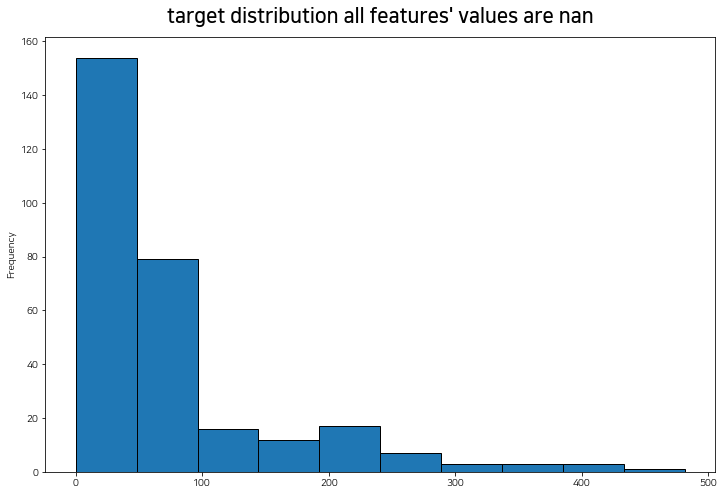

In [ ]:
ax = full_x["train_data"]["target"][full_x["train_data"].drop(["id", "target"], axis=1).isna().all(axis=1)].plot.hist(figsize=(12,8), edgecolor="black")
ax.set_title("target distribution all features' values are nan", fontsize=20, fontweight="bold", pad=15)

Text(0.5, 1.0, "target distribution all features' values are not nan")

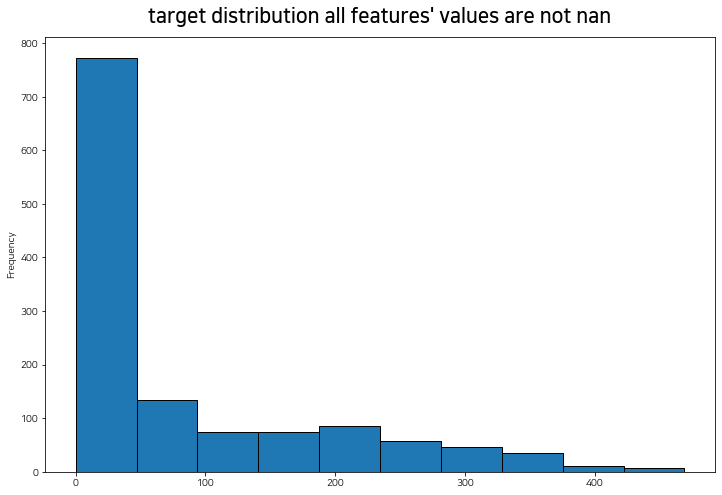

In [ ]:
ax = full_x["train_data"]["target"][~full_x["train_data"].drop(["id", "target"], axis=1).isna().all(axis=1)].plot.hist(figsize=(12,8), edgecolor="black")
ax.set_title("target distribution all features' values are not nan", fontsize=20, fontweight="bold", pad=15)

In [ ]:
# full_x["train_data"].head()

# Imputation - MissForest Imputing

In [ ]:
# missforest_imputor = MissForest(max_iter=10, n_estimators=1000, max_depth=6, max_features=0.8,
#                                 min_samples_split=0.05, min_samples_leaf=5, random_state=42)
# imputed_df = pd.concat([full_x["train_data"][["id"]], dataframe(missforest_imputor.fit_transform(full_x["train_data"].drop("id", axis=1)), columns=full_x["train_data"].drop("id", axis=1).columns)], axis=1)

In [ ]:
# imputed_df[imputed_df.select_dtypes(["float32", "float64"]).columns] = imputed_df.select_dtypes(["float32", "float64"]).astype("float32")

In [ ]:
# imputed_df.info()

In [ ]:
# full_x["train_data"] = imputed_df
# full_x["train_data"] = full_x["train_data"][full_x["train_data"]["id"] != "CASE45_17.png"]
# full_x["train_data"].reset_index(drop=True, inplace=True)

**visualization after NA imputing**

In [ ]:
# for i in imputed_df.select_dtypes(["float32", "float64"]):
#     if i == "target":
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.regplot(imputed_df[i], imputed_df["target"], color="green",
#                 scatter_kws={'s':15}, line_kws={"color": "orange"})
#     graph.set_title(i + " target과 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15) 
#     # graph.set_xticks(graph.get_xticks()[::1])
#     plt.xticks(np.arange(np.min(imputed_df[i]), np.max(imputed_df[i])+1, (np.max(imputed_df[i])+1-np.min(imputed_df[i]))/10))
#     # graph.set_xticklabels(graph.get_xticklabels()[::1], rotation=45)

# Imputation - Normal Distribution Imputing

**feature가 모두 NA인 sample을 랜덤포레스트 방법으로 imputing 시, sample 내 다른 feature를 활용활 수 없는 상황이므로 각 feature에 대해 평균과 비슷하게 imputing이 되어버리는 문제가 발생**

**차라리 augmentation 비슷한 방법으로 target group별 평균 및 표준편차를 구해, 정규분포 랜덤값으로 NA값을 imputing 하는 것으로 결정**

In [ ]:
# imputed_df = full_x["train_data"].copy()
# # imputed_df["target_group"] = pd.cut(np.log1p(imputed_df["target"]), bins=10).astype("object")
# imputed_df["target_group"] = pd.cut(imputed_df["target"], bins=10).astype("object")
# target_group_mean = imputed_df.groupby("target_group").mean()
# target_group_std = np.sqrt(imputed_df.groupby("target_group").std())

In [ ]:
# imputed_df["target_group"].value_counts().sort_index()

In [ ]:
# np_rnd.seed(1)
# for i in imputed_df["target_group"].value_counts().sort_index().index:
#     for j in imputed_df.columns:
#         na_mask = imputed_df[imputed_df["target_group"] == i][j].isna()
#         if na_mask.sum() <= 0:
#             continue
#         imputed_df.loc[(imputed_df["target_group"] == i) & na_mask, j] = np_rnd.normal(target_group_mean.loc[i, j], max(1.0, target_group_std.loc[i, j]), na_mask.sum())
#         # imputed_df.loc[(imputed_df["target_group"] == i) & na_mask, j] = target_group_mean.loc[i, j] + np.abs(np_rnd.normal(0, max(1.0, target_group_std.loc[i, j]), na_mask.sum()))
#         imputed_df[j] = imputed_df[j].apply(lambda x: max(x, full_x["train_data"][j].min()))
#         imputed_df[j] = imputed_df[j].apply(lambda x: min(x, full_x["train_data"][j].max()))

In [ ]:
# imputed_df.info()

In [ ]:
# for i in imputed_df.select_dtypes(["float32", "float64"]):
#     if i in ("id", "target"):
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.regplot(imputed_df[i], imputed_df["target"], color="green",
#                 scatter_kws={'s':15}, line_kws={"color": "orange"})
#     graph.set_title(i + " target과 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15) 
#     # graph.set_xticks(graph.get_xticks()[::1])
#     plt.xticks(np.arange(np.min(imputed_df[i]), np.max(imputed_df[i])+1, (np.max(imputed_df[i])+1-np.min(imputed_df[i]))/10))
#     # graph.set_xticklabels(graph.get_xticklabels()[::1], rotation=45)

In [ ]:
# imputed_df.head()

In [ ]:
# missforest_imputor = MissForest(max_iter=10, n_estimators=1000, max_depth=6, max_features=0.8,
#                                 min_samples_split=0.05, min_samples_leaf=5, random_state=42)
# missforest_imputor.fit(imputed_df.drop(["id", target_var, "target_group"], axis=1))

In [ ]:
# for i in test_x["test_data"]:
#     if i == "id":
#         continue
#     test_x["test_data"][i] = test_x["test_data"][i].fillna(full_x["train_data"][i].median())

In [ ]:
# full_x["train_data"] = imputed_df.drop("target_group", axis=1)
# full_x["train_data"] = full_x["train_data"][full_x["train_data"]["id"] != "CASE45_17.png"]
# full_x["train_data"].reset_index(drop=True, inplace=True)

In [ ]:
# full_x["train_data"].info()

In [ ]:
# test_x["test_data"].info()

# Imputation - Drop na values and MissForest Imputing

**Drop samples which all the features' are na values and imputing missforest**

In [ ]:
# full_x["train_data"].info()

In [ ]:
# imputed_df = full_x["train_data"].copy()
# imputed_df = imputed_df[~imputed_df.drop(["id", "target"], axis=1).isna().all(axis=1)]
# imputed_df.reset_index(drop=True, inplace=True)

In [ ]:
# imputed_df.drop(["id", "target"], axis=1).isna().all(axis=1).sum()

In [ ]:
# imputed_df.info()

In [ ]:
# missforest_imputor = MissForest(max_iter=10, n_estimators=1000, max_depth=6, max_features=0.8,
#                                 min_samples_split=0.05, min_samples_leaf=5, random_state=42)
# imputed_df = pd.concat([imputed_df[["id", target_var]], dataframe(missforest_imputor.fit_transform(imputed_df.drop(["id", target_var], axis=1)), columns=imputed_df.drop(["id", target_var], axis=1).columns)], axis=1)

**replace original df with imputed df**

In [ ]:
# imputed_df.info()

# Imputation(Present) - using random normal noise & knn obejcts on target

**create time series data**

In [ ]:
train_timeseries = np.empty((full_x["train_data"].shape[0], group_nums, len(num_vars)))
# time group 별 dataframe들을 모두 row-by로 concat한 후 id 를 인덱스로 설정
all_timeseries_df = pd.concat([full_x["metadata_timegroup_" + str(i)] for i in range(group_nums)], axis=0).set_index("id")
for idx, value in enumerate(full_x["train_data"]["id"]):
    # 각 sample id 별로 추출하여 3차원 배열에 넣기 (num_vars에 입력된 순서대로 뽑아 입력)
    tmp_df = all_timeseries_df.loc[value, num_vars]
    # na값이 전체 길이의 50%를 초과하지 않으면 forward fill 적용
    for i in tmp_df:
        if tmp_df[i].isna().sum() <= len(tmp_df[i]) * 0.5:
            tmp_df[i] = tmp_df[i].ffill().bfill()
    train_timeseries[idx] = tmp_df.to_numpy(dtype="float32")
print(train_timeseries.shape)

(1592, 96, 18)


In [ ]:
full_x_img = full_x["id_table"]["id"]
full_y = full_x["id_table"][["target"]]

In [ ]:
tmp_timeseries = dataframe(np.concatenate([i for i in train_timeseries], axis=0), columns=num_vars)

In [ ]:
tmp_timeseries.shape

(152832, 18)

**시계열 데이터를 feature 별로 concat 하여 시각화**

In [ ]:
# # histogram
# for i in tmp_timeseries.select_dtypes(["float32", "float64"]):
#     if i == "target":
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.histplot(tmp_timeseries[i])
#     graph.set_title(i + " 분포 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.xticks(np.arange(np.min(tmp_timeseries[i]), np.max(tmp_timeseries[i])+1, (np.max(tmp_timeseries[i])+1-np.min(tmp_timeseries[i]))/20),
#             fontsize=12, fontweight="bold")
#     plt.yticks(fontsize=12, fontweight="bold")

In [ ]:
# # boxplot
# for i in tmp_timeseries.select_dtypes(["float32", "float64"]):
#     if i == "target":
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.boxplot(tmp_timeseries[i])
#     graph.set_title(i + " 분포 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.xticks(np.arange(np.min(tmp_timeseries[i]), np.max(tmp_timeseries[i])+1, (np.max(tmp_timeseries[i])+1-np.min(tmp_timeseries[i]))/20),
#             fontsize=12, fontweight="bold")
#     # plt.yticks(fontsize=12, fontweight="bold")

In [ ]:
# # violin plot
# for i in tmp_timeseries.select_dtypes(["float32", "float64"]):
#     if i == "target":
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.violinplot(tmp_timeseries[i])
#     graph.set_title(i + " 분포 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.xticks(np.arange(np.min(tmp_timeseries[i]), np.max(tmp_timeseries[i])+1, (np.max(tmp_timeseries[i])+1-np.min(tmp_timeseries[i]))/20),
#             fontsize=12, fontweight="bold")
#     # plt.yticks(fontsize=12, fontweight="bold")

In [ ]:
# plt.figure(figsize=(16, 9))
# graph = sns.heatmap(tmp_timeseries.corr().round(2), annot=True, cmap="YlGnBu", annot_kws={"fontsize": 13, "fontweight": "bold"})
# graph.set_xticklabels(graph.get_xticklabels(), fontsize=12, fontweight="bold", rotation=45)
# graph.set_yticklabels(graph.get_yticklabels(), fontsize=12, fontweight="bold")

In [ ]:
tmp_timeseries["최근분무량"].value_counts().sort_index()

0.000000         9418
74.559998          29
80.989998         139
87.419998          55
106.709999          2
                 ... 
14559.559570       14
642939.500000       4
642945.937500       6
642991.000000       8
642997.375000       2
Name: 최근분무량, Length: 336, dtype: int64

In [ ]:
tmp_timeseries["외부습도관측치"].value_counts().sort_index()

0.000000      1685
5.500000         2
5.600000         6
5.800000        10
5.900000         8
              ... 
92.300003        1
92.500000        1
92.599998        1
92.699997        1
201.000000      43
Name: 외부습도관측치, Length: 2609, dtype: int64

In [ ]:
tmp_timeseries["EC관측치"].value_counts().sort_index()

0.000000     11413
0.000756         1
0.000770        18
0.000905        33
0.000939         2
             ...  
30.000000        2
30.200001        3
30.299999        1
30.500000        1
30.900000        1
Name: EC관측치, Length: 14314, dtype: int64

In [ ]:
del tmp_timeseries

**필요한 feature만 추출 후 다시 train timeseries 데이터 생성**

In [ ]:
# num_vars = ["내부온도관측치", "내부습도관측치", "CO2관측치", "EC관측치", "최근분무량",
#             "화이트 LED동작강도", "레드 LED동작강도", "블루 LED동작강도",
#             "냉방온도", "냉방부하", "난방온도", "난방부하"]

In [ ]:
train_timeseries = np.empty((full_x["train_data"].shape[0], group_nums, len(num_vars)))
# time group 별 dataframe들을 모두 row-by로 concat한 후 id 를 인덱스로 설정
all_timeseries_df = pd.concat([full_x["metadata_timegroup_" + str(i)] for i in range(group_nums)], axis=0).set_index("id")
for idx, value in enumerate(full_x["train_data"]["id"]):
    # 각 sample id 별로 추출하여 3차원 배열에 넣기 (num_vars에 입력된 순서대로 뽑아 입력)
    tmp_df = all_timeseries_df.loc[value, num_vars]
    # na값이 전체 길이의 50%를 초과하지 않으면 forward fill 적용
    for i in tmp_df:
        if tmp_df[i].isna().sum() <= len(tmp_df[i]) * 0.5:
            tmp_df[i] = tmp_df[i].ffill().bfill()
    train_timeseries[idx] = tmp_df.to_numpy(dtype="float32")
print(train_timeseries.shape)

(1592, 96, 18)


In [ ]:
notAll_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
notAny_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
for i in range(train_timeseries.shape[0]):
    if np.isnan(train_timeseries[i]).sum() == train_timeseries.shape[1] * train_timeseries.shape[2]:
        notAll_na_list[i] = False
    elif np.isnan(train_timeseries[i]).sum() > 0:
        notAny_na_list[i] = False

In [ ]:
print("모든 데이터가 nan 인 샘플")
print(np.invert(notAll_na_list).sum())
print("하나 이상의 데이터가 nan 인 샘플")
print(np.invert(notAny_na_list).sum())

모든 데이터가 nan 인 샘플
283
하나 이상의 데이터가 nan 인 샘플
40


**시계열 데이터 분포에 근거하여 이상치를 nan으로 대치 후 foward fill**

In [ ]:
def insert_nan_anomaly(x):
    tmp_df = dataframe(x, columns=num_vars)
    tmp_df["최근분무량"][tmp_df["최근분무량"] > 100000.0] = nan
    # na값이 전체 길이의 50%를 초과하지 않으면 forward fill 적용
    for i in tmp_df:
        if tmp_df[i].isna().sum() <= len(tmp_df[i]) * 0.5:
            tmp_df[i] = tmp_df[i].ffill().bfill()
    return array(tmp_df)

In [ ]:
for i in range(train_timeseries.shape[0]):
    train_timeseries[i] = insert_nan_anomaly(train_timeseries[i])

In [ ]:
notAll_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
notAny_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
for i in range(train_timeseries.shape[0]):
    if np.isnan(train_timeseries[i]).sum() == train_timeseries.shape[1] * train_timeseries.shape[2]:
        notAll_na_list[i] = False
    elif np.isnan(train_timeseries[i]).sum() > 0:
        notAny_na_list[i] = False

In [ ]:
print("모든 데이터가 nan 인 샘플")
print(np.invert(notAll_na_list).sum())
print("하나 이상의 데이터가 nan 인 샘플")
print(np.invert(notAny_na_list).sum())

모든 데이터가 nan 인 샘플
283
하나 이상의 데이터가 nan 인 샘플
40


In [ ]:
# anomaly_vec = anomaly_vec[0] & anomaly_vec[1] & anomaly_vec[2]

In [ ]:
# print("samples before removig anoamlies :", train_timeseries.shape[0])
# print("samples after removig anoamlies :", sum(anomaly_vec))

In [ ]:
# train_timeseries = train_timeseries[anomaly_vec]
# full_x["train_data"] = full_x["train_data"][anomaly_vec]
# full_x["train_data"].reset_index(drop=True, inplace=True)

In [ ]:
train_timeseries.shape[1] * train_timeseries.shape[2]

1728

In [ ]:
notAll_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
notAny_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
for i in range(train_timeseries.shape[0]):
    if np.isnan(train_timeseries[i]).sum() == train_timeseries.shape[1] * train_timeseries.shape[2]:
        notAll_na_list[i] = False
    elif np.isnan(train_timeseries[i]).sum() > 0:
        notAny_na_list[i] = False

In [ ]:
print("모든 데이터가 nan 인 샘플")
print(np.invert(notAll_na_list).sum())
print("하나 이상의 데이터가 nan 인 샘플")
print(np.invert(notAny_na_list).sum())

모든 데이터가 nan 인 샘플
283
하나 이상의 데이터가 nan 인 샘플
40


**test timeseries 데이터 생성**

In [ ]:
test_timeseries = np.empty((test_x["test_data"].shape[0], group_nums, len(num_vars)))
all_timeseries_df = pd.concat([test_x["metadata_timegroup_" + str(i)] for i in range(group_nums)], axis=0).set_index("id")
for idx, value in enumerate(test_x["test_data"]["id"]):
    # fill & bfill 후 nan 값이 남아있는 timeseries 데이터는 모든 데이터가 nan 값이기 때문임
    tmp_df = all_timeseries_df.loc[value, num_vars]
    # na값이 전체 길이의 50%를 초과하지 않으면 forward fill 적용
    for i in tmp_df:
        if tmp_df[i].isna().sum() <= len(tmp_df[i]) * 0.5:
            tmp_df[i] = tmp_df[i].ffill().bfill()
    test_timeseries[idx] = tmp_df.to_numpy(dtype="float32")
print(test_timeseries.shape)

(460, 96, 18)


In [ ]:
test_x_img = test_x["id_table"]["id"]

In [ ]:
notAll_na_list = np.ones(test_timeseries.shape[0], dtype="bool")
notAny_na_list = np.ones(test_timeseries.shape[0], dtype="bool")
for i in range(test_timeseries.shape[0]):
    if np.isnan(test_timeseries[i]).sum() == test_timeseries.shape[1] * test_timeseries.shape[2]:
        notAll_na_list[i] = False
    elif np.isnan(test_timeseries[i]).sum() > 0:
        notAny_na_list[i] = False

In [ ]:
np.isnan(test_timeseries).sum()

1485

In [ ]:
print("모든 데이터가 nan 인 샘플")
print(np.invert(notAll_na_list).sum())
print("하나 이상의 데이터가 nan 인 샘플")
print(np.invert(notAny_na_list).sum())

모든 데이터가 nan 인 샘플
0
하나 이상의 데이터가 nan 인 샘플
2


# 1. drop NA

In [ ]:
# train_timeseries = train_timeseries[all_na_list]
# full_x_img = full_x_img[all_na_list]; full_x_img.reset_index(drop=True, inplace=True)
# full_y = full_y[all_na_list]; full_y.reset_index(drop=True, inplace=True)

**image 이상치 & target이 0인 sample drop**

In [ ]:
# train_timeseries = train_timeseries[full_x_img != "CASE45_17.png"]
# full_y = full_y[full_x_img != "CASE45_17.png"]; full_y.reset_index(drop=True, inplace=True)
# full_x_img = full_x_img[full_x_img != "CASE45_17.png"]; full_x_img.reset_index(drop=True, inplace=True)

# train_timeseries = train_timeseries[full_y["target"] == 0]
# full_x_img = full_x_img[full_y["target"] == 0]; full_x_img.reset_index(drop=True, inplace=True)
# full_y = full_y[full_y["target"] == 0]; full_y.reset_index(drop=True, inplace=True)

In [ ]:
# train_timeseries.shape

In [ ]:
# viz_df = dataframe(np.concatenate([i for i in train_timeseries], axis=0), columns=num_vars)
# for i in viz_df:
#     print(viz_df[i].value_counts())
#     print()

In [ ]:
# for i in viz_df.select_dtypes(["float32", "float64"]):
#     if i == "target":
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.histplot(viz_df[i])
#     graph.set_title(i + " 분포 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.xticks(np.arange(np.min(viz_df[i]), np.max(viz_df[i])+1, (np.max(viz_df[i])+1-np.min(viz_df[i]))/10),
#             fontsize=12, fontweight="bold")
#     plt.yticks(fontsize=12, fontweight="bold")
#     # plt.savefig(folder_path + "EDA/graphs/trainFeature_before_remove_anomaly_" + i)

In [ ]:
# test_timeseries = np.empty((test_x["test_data"].shape[0], group_nums, len(num_vars)))
# all_timeseries_df = pd.concat([test_x["metadata_timegroup_" + str(i)] for i in range(group_nums)], axis=0).set_index("id")
# for idx, value in enumerate(test_x["test_data"]["id"]):
#     # if (~tmp_df.loc[value, num_vars].isna()).sum().sum() == 0:
#     #     print("all values are nan :", value)
#     # elif tmp_df.loc[value, num_vars].isna().sum().sum() >= len(num_vars) * 24 // 2:
#     #     print("na values are half :", value)
#     # fill & bfill 후 nan 값이 남아있는 timeseries 데이터는 모든 데이터가 nan 값이기 때문임
#     test_timeseries[idx] = all_timeseries_df.loc[value, num_vars].ffill().bfill().to_numpy(dtype="float32")
# print(test_timeseries.shape)

In [ ]:
# test_x_img = test_x["id_table"]["id"]

In [ ]:
# all_na_list = np.ones(test_timeseries.shape[0], dtype="bool")
# exist_na_list = np.ones(test_timeseries.shape[0], dtype="bool")
# for i in range(test_timeseries.shape[0]):
#     if np.isnan(test_timeseries[i]).sum() == test_timeseries.shape[1] * test_timeseries.shape[2]:
#         all_na_list[i] = False
#     elif np.isnan(test_timeseries[i]).sum() > test_timeseries.shape[1] * test_timeseries.shape[2]:
#         exist_na_list[i] = False

In [ ]:
# print("모든 데이터가 nan 인 샘플")
# print(np.invert(all_na_list).sum())
# print("하나 이상의 데이터가 nan 인 샘플")
# print(np.invert(exist_na_list).sum())

In [ ]:
# ct = ColumnTransformer([
#     ("내부온도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부온도관측치"]),
#     ("내부습도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부습도관측치"]),
#     ("CO2관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["CO2관측치"]),
#     ("EC관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["EC관측치"]),
#     ("최근분무량_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["최근분무량"]),
#     ("화이트 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["화이트 LED동작강도"]),
#     ("레드 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["레드 LED동작강도"]),
#     ("블루 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["블루 LED동작강도"]),
#     ("냉방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["냉방온도"]),
#     ("냉방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["냉방부하"]),
#     ("난방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["난방온도"]),
#     ("난방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["난방부하"]),
# ])

In [ ]:
# ct.fit(pd.concat([dataframe(i, columns=num_vars) for i in train_timeseries], axis=0).dropna())

# 2. KNN Imputing

In [ ]:
# remove image anomaly
train_timeseries = train_timeseries[full_x_img != "CASE45_17.png"]
full_y = full_y[full_x_img != "CASE45_17.png"]; full_y.reset_index(drop=True, inplace=True)
full_x_img = full_x_img[full_x_img != "CASE45_17.png"]; full_x_img.reset_index(drop=True, inplace=True)
# remove target 0
train_timeseries = train_timeseries[full_y["target"] != 0.0]
full_x_img = full_x_img[full_y["target"] != 0.0]; full_x_img.reset_index(drop=True, inplace=True)
full_y = full_y[full_y["target"] != 0.0]; full_y.reset_index(drop=True, inplace=True)

In [ ]:
full_x_img

0       CASE01_01.png
1       CASE01_02.png
2       CASE01_03.png
3       CASE01_04.png
4       CASE01_05.png
            ...      
1578    CASE74_25.png
1579    CASE74_26.png
1580    CASE74_27.png
1581    CASE75_01.png
1582    CASE75_02.png
Name: id, Length: 1583, dtype: object

In [ ]:
full_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  1583 non-null   float32
dtypes: float32(1)
memory usage: 6.3 KB


**imputing 전, 사전 discretizer fit 작업 (imputing 된 값이 군집에 영향을 미칠 수 있으므로)**

In [ ]:
ct = ColumnTransformer([
    ("내부온도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부온도관측치"]),
    ("외부온도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["외부온도관측치"]),
    ("내부습도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부습도관측치"]),
    ("외부습도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["외부습도관측치"]),
    ("CO2관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["CO2관측치"]),
    ("EC관측치_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["EC관측치"]),
    ("최근분무량_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["최근분무량"]),
    ("화이트 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["화이트 LED동작강도"]),
    ("레드 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["레드 LED동작강도"]),
    ("블루 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["블루 LED동작강도"]),
    ("냉방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["냉방온도"]),
    ("냉방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["냉방부하"]),
    ("난방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["난방온도"]),
    ("난방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["난방부하"]),
    ("총추정광량_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["총추정광량"]),
    ("백색광추정광량_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["백색광추정광량"]),
    ("적색광추정광량_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["적색광추정광량"]),
    ("청색광추정광량_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["청색광추정광량"]),
])

In [ ]:
# ct = ColumnTransformer([
#     ("내부온도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부온도관측치"]),
#     ("내부습도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부습도관측치"]),
#     ("CO2관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["CO2관측치"]),
#     ("EC관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["EC관측치"]),
#     ("최근분무량_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["최근분무량"]),
#     ("화이트 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["화이트 LED동작강도"]),
#     ("레드 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["레드 LED동작강도"]),
#     ("블루 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["블루 LED동작강도"]),
#     ("냉방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["냉방온도"]),
#     ("냉방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["냉방부하"]),
#     ("난방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["난방온도"]),
#     ("난방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["난방부하"]),
# ])

In [ ]:
cat_vars = [i[0] for i in ct._transformers]

In [ ]:
ct.fit(pd.concat([dataframe(i, columns=num_vars) for i in train_timeseries], axis=0).dropna())

ColumnTransformer(transformers=[('내부온도관측치_discret',
                                 KBinsDiscretizer(encode='ordinal', n_bins=100,
                                                  strategy='kmeans'),
                                 ['내부온도관측치']),
                                ('외부온도관측치_discret',
                                 KBinsDiscretizer(encode='ordinal', n_bins=100,
                                                  strategy='kmeans'),
                                 ['외부온도관측치']),
                                ('내부습도관측치_discret',
                                 KBinsDiscretizer(encode='ordinal', n_bins=100,
                                                  strategy='kmeans'),
                                 ['내부습도관측치']),
                                ('외부습도관측치_discret',
                                 KBinsDiscre...
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='kmeans'),
    

**결측된 데이터가 있는 특정 샘플에 대해 knn을 찾고 random normal imputing 시행 (image + target 값 사용)**

In [ ]:
# 모든 데이터가 nan인 index 산출
notAll_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
notAny_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
for i in range(train_timeseries.shape[0]):
    if np.isnan(train_timeseries[i]).sum() == train_timeseries.shape[1] * train_timeseries.shape[2]:
        notAll_na_list[i] = False
    elif np.isnan(train_timeseries[i]).sum() > 0:
        notAny_na_list[i] = False

In [ ]:
print("모든 데이터가 nan 인 샘플")
print(np.invert(notAll_na_list).sum())
print("하나 이상의 데이터가 nan 인 샘플")
print(np.invert(notAny_na_list).sum())

모든 데이터가 nan 인 샘플
278
하나 이상의 데이터가 nan 인 샘플
40


In [ ]:
np.isnan(train_timeseries[notAll_na_list & notAny_na_list]).sum()

0

In [ ]:
candidates_mask = notAll_na_list & notAny_na_list

In [ ]:
knn_candidates = full_y[["target"]][candidates_mask].copy()

In [ ]:
# minmax normalization
knn_scaler = MinMaxScaler()
knn_candidates = dataframe(knn_scaler.fit_transform(knn_candidates), index=knn_candidates.index)

In [ ]:
img_size = 128
channels = 3
knn_img = np.empty((candidates_mask.sum(), img_size * img_size * channels))
for idx, value in enumerate(full_x_img[candidates_mask].apply(lambda x: get_image_path(x, train=True))):
    image = tf.io.read_file(value)
    image = tf.io.decode_image(image, channels=channels, expand_animations=False)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize_with_pad(image, img_size, img_size, antialias=True).numpy().flatten() / 255.0
    knn_img[idx] = image

In [ ]:
knn_candidates = pd.concat([dataframe(knn_img, index=knn_candidates.index), knn_candidates], axis=1).astype("float32")
knn_candidates.columns = list(range(knn_candidates.shape[1]))
del knn_img

In [ ]:
knn_candidates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265 entries, 20 to 1582
Columns: 49153 entries, 0 to 49152
dtypes: float32(49153)
memory usage: 237.2 MB


In [ ]:
knn_candidates.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,49103,49104,49105,49106,49107,49108,49109,49110,49111,49112,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151,49152
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024120
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033482
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045772
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057711
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068771


In [ ]:
# # 적당한 neighbor 갯수를 찾기 위해 KMeans 클러스터링 수행
# sil = []
# kmax = 20

# # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
# for k in range(2, kmax+1):
#     model_kmeans = KMeans(n_clusters=k, random_state=42)
#     model_kmeans.fit(cd.DataFrame.from_pandas(knn_candidates))
#     sil.append(silhouette_score(cd.DataFrame.from_pandas(knn_candidates), model_kmeans.labels_, metric='euclidean'))

In [ ]:
# print(series(sil, index=range(2, kmax+1)).sort_index(ascending=True))

In [ ]:
# get best cluster model
# size=64*64*3, k=11
# size=128*128*3, k=7, 0.255565
model_kmeans = KMeans(n_clusters=7, random_state=42).fit(cd.DataFrame.from_pandas(knn_candidates)).labels_.value_counts()
print(model_kmeans)

1    565
3    199
2    166
0    136
6    131
5     44
4     24
dtype: int32


In [ ]:
knn_finder = NearestNeighbors(n_neighbors=model_kmeans.min())
knn_finder.fit(cd.DataFrame.from_pandas(knn_candidates))

NearestNeighbors()

In [ ]:
knn_candidates.shape

(1265, 49153)

In [ ]:
queries_mask = np.invert(notAll_na_list) | np.invert(notAny_na_list)

In [ ]:
# create query dataset
knn_queries = full_y[["target"]][queries_mask].copy()

In [ ]:
knn_queries = dataframe(knn_scaler.transform(knn_queries), index=knn_queries.index)

In [ ]:
img_size = 128
channels = 3
knn_img = np.empty((queries_mask.sum(), img_size * img_size * channels))
for idx, value in enumerate(full_x_img[queries_mask].apply(lambda x: get_image_path(x, train=True))):
    image = tf.io.read_file(value)
    image = tf.io.decode_image(image, channels=channels, expand_animations=False)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize_with_pad(image, img_size, img_size, antialias=True).numpy().flatten() / 255.0
    knn_img[idx] = image

In [ ]:
knn_queries = pd.concat([dataframe(knn_img, index=knn_queries.index), knn_queries], axis=1).astype("float32")
knn_queries.columns = list(range(knn_queries.shape[1]))
del knn_img

In [ ]:
queries_result_table = knn_finder.kneighbors(cd.DataFrame.from_pandas(knn_queries), return_distance=False).to_numpy()

In [ ]:
# train data imputation
seed_everything()
for i in range(queries_result_table.shape[0]):
    target_arr = train_timeseries[knn_queries.index[i]]
    target_na_mask = np.isnan(target_arr)
    knn_arr = train_timeseries[knn_candidates.index[queries_result_table[i]]]

    mean_arr = train_timeseries[knn_candidates.index[queries_result_table[i]]].mean(axis=0)
    max_arr = train_timeseries[knn_candidates.index[queries_result_table[i]]].max(axis=0)
    min_arr = train_timeseries[knn_candidates.index[queries_result_table[i]]].min(axis=0)
    noise_arr = tf.random.truncated_normal(shape=mean_arr.shape).numpy()
    imputed_arr = np.clip(mean_arr + noise_arr, min_arr, max_arr)

    target_arr[target_na_mask] = 0
    imputed_arr[np.invert(target_na_mask)] = 0
    train_timeseries[knn_queries.index[i]] = target_arr + imputed_arr

In [ ]:
np.isnan(train_timeseries).sum()

0

In [ ]:
# 모든 데이터가 nan인 index 산출
notAll_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
notAny_na_list = np.ones(train_timeseries.shape[0], dtype="bool")
for i in range(train_timeseries.shape[0]):
    if np.isnan(train_timeseries[i]).sum() == train_timeseries.shape[1] * train_timeseries.shape[2]:
        notAll_na_list[i] = False
    elif np.isnan(train_timeseries[i]).sum() > 0:
        notAny_na_list[i] = False

In [ ]:
print("모든 데이터가 nan 인 샘플")
print(np.invert(notAll_na_list).sum())
print("하나 이상의 데이터가 nan 인 샘플")
print(np.invert(notAny_na_list).sum())

모든 데이터가 nan 인 샘플
0
하나 이상의 데이터가 nan 인 샘플
0


In [ ]:
# test data imputation using MissForest
missforest_imputor = MissForest(max_iter=10, n_estimators=1000, max_depth=6, max_features=0.75,
                                min_samples_split=0.01, min_samples_leaf=3, random_state=42)
missforest_imputor.fit(np.concatenate([i for i in train_timeseries], axis=0))

MissForest(max_depth=6, max_features=0.75, min_samples_leaf=3,
           min_samples_split=0.01, n_estimators=1000, random_state=42)

In [ ]:
notAll_na_list = np.ones(test_timeseries.shape[0], dtype="bool")
notAny_na_list = np.ones(test_timeseries.shape[0], dtype="bool")
for i in range(test_timeseries.shape[0]):
    if np.isnan(test_timeseries[i]).sum() == test_timeseries.shape[1] * test_timeseries.shape[2]:
        notAll_na_list[i] = False
    elif np.isnan(test_timeseries[i]).sum() > 0:
        notAny_na_list[i] = False

In [ ]:
print("모든 데이터가 nan 인 샘플")
print(np.invert(notAll_na_list).sum())
print("하나 이상의 데이터가 nan 인 샘플")
print(np.invert(notAny_na_list).sum())

모든 데이터가 nan 인 샘플
0
하나 이상의 데이터가 nan 인 샘플
2


In [ ]:
for i in series(range(test_timeseries.shape[0]))[np.invert(notAll_na_list) | np.invert(notAny_na_list)]:
    test_timeseries[i] = missforest_imputor.transform(test_timeseries[i])

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [ ]:
np.isnan(test_timeseries).sum()

0

**imputing 전 시각화**

In [ ]:
# for i in imputed_df.select_dtypes(["float32", "float64"]):
#     if i in ("id", "target"):
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.regplot(imputed_df[i], imputed_df["target"], color="green",
#                 scatter_kws={'s':15}, line_kws={"color": "orange"})
#     graph.set_title(i + " - target 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15) 
#     # graph.set_xticks(graph.get_xticks()[::1])
#     plt.xticks(np.arange(np.min(imputed_df[i]), np.max(imputed_df[i])+1, (np.max(imputed_df[i])+1-np.min(imputed_df[i]))/10),
#                fontsize=12, fontweight="bold")
#     plt.yticks(fontsize=12, fontweight="bold")
#     # graph.set_xticklabels(graph.get_xticklabels()[::1], rotation=45)

In [ ]:
# # 기존 특정 시간대만 뽑은 full_x["train_data"] (imputed_df)도 만약 nan값이 하나라도 있으면 이를 timeseries 데이터에서 대치
# for i in list(imputed_df["id"][imputed_df.drop(["id", "target"], axis=1).isna().any(axis=1)].index):
#     replace_vec = []
#     for idx, (var_name, var_idx) in enumerate(selected_features):  
#         replace_vec.append(train_timeseries[i][var_idx, idx])
#         # if train_timeseries[i][var_idx, idx] > 1200:
#         #     print(i, idx, var_name, var_idx)
#     imputed_df.loc[i, num_vars] = replace_vec

**imputing 후 시각화**

In [ ]:
# imputed_df.info()

In [ ]:
# for i in imputed_df.select_dtypes(["float32", "float64"]):
#     if i == "target":
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.histplot(imputed_df[i])
#     graph.set_title(i + " 분포 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15)
#     plt.xticks(np.arange(np.min(imputed_df[i]), np.max(imputed_df[i])+1, (np.max(imputed_df[i])+1-np.min(imputed_df[i]))/10),
#                fontsize=12, fontweight="bold")
#     plt.yticks(fontsize=12, fontweight="bold")
#     # plt.savefig(folder_path + "EDA/graphs/trainFeature_after_remove_anomaly_" + i)

In [ ]:
# for i in imputed_df.select_dtypes(["float32", "float64"]):
#     if i in ("id", "target"):
#         continue
#     plt.figure(figsize=(16, 9))
#     graph = sns.regplot(imputed_df[i], imputed_df["target"], color="green",
#                 scatter_kws={'s':15}, line_kws={"color": "orange"})
#     graph.set_title(i + " - target 시각화", fontsize=15, fontweight="bold", pad=15)
#     graph.set_xlabel(graph.get_xlabel(), fontsize=12, fontweight="bold", labelpad=15)
#     graph.set_ylabel(graph.get_ylabel(), fontsize=12, fontweight="bold", labelpad=15) 
#     # graph.set_xticks(graph.get_xticks()[::1])
#     plt.xticks(np.arange(np.min(imputed_df[i]), np.max(imputed_df[i])+1, (np.max(imputed_df[i])+1-np.min(imputed_df[i]))/10),
#                fontsize=12, fontweight="bold")
#     plt.yticks(fontsize=12, fontweight="bold")
#     # graph.set_xticklabels(graph.get_xticklabels()[::1], rotation=45)

In [ ]:
# missforest_imputor = MissForest(max_iter=10, n_estimators=1000, max_depth=6, max_features=0.8,
#                                 min_samples_split=0.05, min_samples_leaf=5, random_state=42)
# missforest_imputor.fit(imputed_df.drop(["id", target_var], axis=1))

In [ ]:
# np.isnan(test_timeseries).sum()

In [ ]:
del model_kmeans, knn_finder, knn_candidates, knn_queries, missforest_imputor

# Replace original df

In [ ]:
# full_x["train_data"] = imputed_df
# full_x["train_data"].head()

In [ ]:
# full_x["train_data"].info()

In [ ]:
# test_x["test_data"][test_x["test_data"].isna().any(axis=1)]

In [ ]:
# for i in list(test_x["test_data"]["id"][test_x["test_data"].drop(["id"], axis=1).isna().any(axis=1)].index):
#     replace_vec = []
#     for idx, (var_name, var_idx) in enumerate(selected_features):
#         replace_vec.append(test_timeseries[i][var_idx, idx])
#     test_x["test_data"].loc[i, num_vars] = replace_vec

In [ ]:
# test_x["test_data"].info()

In [ ]:
# test_x["test_data"] = pd.concat([test_x["test_data"][["id"]], dataframe(missforest_imputor.transform(test_x["test_data"].drop(["id"], axis=1)), columns=test_x["test_data"].drop(["id"], axis=1).columns)], axis=1)

In [ ]:
# train_timeseries = train_timeseries[full_x["train_data"]["id"] != "CASE45_17.png"]
# full_x["train_data"] = full_x["train_data"][full_x["train_data"]["id"] != "CASE45_17.png"]
# full_x["train_data"].reset_index(drop=True, inplace=True)

In [ ]:
# full_x["train_data"].info()

In [ ]:
# test_x["test_data"].info()

# Feature Diescretization


**try1**
*   내부온도관측치 -> 20
*   내부습도관측치 -> 20
*   CO2관측치 -> 20
*   EC관측치 -> 10
*   최근분무량 -> 10
*   화이트 LED동작강도 - 5
*   레드 LED동작강도 - 7
*   블루 LED동작강도 - 7
*   냉방온도 - 9
*   냉방부하 - 20
*   난방온도 - 8
*   난방부하 -> 5

**try2**

*   20 -> 10



In [ ]:
# full_y = full_x["train_data"][[target_var]]
# full_y[target_var].hist()
# # target transformation
# full_y[target_var] = np.log1p(full_y[target_var])
# full_x = full_x["train_data"].drop(target_var, axis=1)
# test_x = test_x["test_data"]

In [ ]:
# full_y[target_var].hist()

In [ ]:
# embed_size = 64
# ct = ColumnTransformer([
#     ("내부온도관측치_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["내부온도관측치"]),
#     ("내부습도관측치_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["내부습도관측치"]),
#     ("CO2관측치_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["CO2관측치"]),
#     ("EC관측치_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["EC관측치"]),
#     ("최근분무량_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["최근분무량"]),
#     ("화이트 LED동작강도_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["화이트 LED동작강도"]),
#     ("레드 LED동작강도_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["레드 LED동작강도"]),
#     ("블루 LED동작강도_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["블루 LED동작강도"]),
#     ("냉방온도_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["냉방온도"]),
#     ("냉방부하_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["냉방부하"]),
#     ("난방온도_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["난방온도"]),
#     ("난방부하_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["난방부하"]),
#     ("총추정광량_discret", KBinsDiscretizer(embed_size, encode="ordinal", strategy="kmeans"), ["총추정광량"])
# ])

In [ ]:
# ct.fit(pd.concat([dataframe(i, columns=num_vars) for i in train_timeseries], axis=0).dropna())

In [ ]:
# full_x = pd.concat([full_x[["id"]], full_x.drop("id", axis=1), dataframe(ct.transform(full_x).astype("int32"), columns=[i[0] for i in ct.transformers_])], axis=1)
# test_x = pd.concat([test_x[["id"]], test_x.drop("id", axis=1), dataframe(ct.transform(test_x).astype("int32"), columns=[i[0] for i in ct.transformers_])], axis=1)

In [ ]:
# full_x["냉방부하_binary"] = full_x["냉방부하"].apply(lambda x: 0.0 if x==0.0 else 1.0)
# full_x["난방부하_binary"] = full_x["난방부하"].apply(lambda x: 0.0 if x==0.0 else 1.0)

In [ ]:
# test_x["냉방부하_binary"] = test_x["냉방부하"].apply(lambda x: 0.0 if x==0.0 else 1.0)
# test_x["난방부하_binary"] = test_x["난방부하"].apply(lambda x: 0.0 if x==0.0 else 1.0)

In [ ]:
# full_x.info()

In [ ]:
# test_x.info()

In [ ]:
train_timeseries = np.concatenate([np.concatenate([i, ct.transform(dataframe(i, columns=num_vars))], axis=1)[np.newaxis, ...] for i in train_timeseries], axis=0)
test_timeseries = np.concatenate([np.concatenate([i, ct.transform(dataframe(i, columns=num_vars))], axis=1)[np.newaxis, ...] for i in test_timeseries], axis=0)

In [ ]:
tmp_list = []
for idx, value in enumerate(train_timeseries):
    tmp_list.append(np.concatenate([
        value,
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("EC관측치")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("최근분무량")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("화이트 LED동작강도")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("레드 LED동작강도")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("블루 LED동작강도")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("냉방부하")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("난방부하")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("총추정광량")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("백색광추정광량")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("적색광추정광량")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("청색광추정광량")]])[..., np.newaxis],
    ], axis=1)[np.newaxis, ...])
train_timeseries = np.concatenate(tmp_list, axis=0)
tmp_list = []
for idx, value in enumerate(test_timeseries):
    tmp_list.append(np.concatenate([
        value,
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("EC관측치")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("최근분무량")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("화이트 LED동작강도")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("레드 LED동작강도")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("블루 LED동작강도")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("냉방부하")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("난방부하")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("총추정광량")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("백색광추정광량")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("적색광추정광량")]])[..., np.newaxis],
        array([1.0 if j==0.0 else 0.0 for j in value[:,num_vars.index("청색광추정광량")]])[..., np.newaxis],
    ], axis=1)[np.newaxis, ...])
test_timeseries = np.concatenate(tmp_list, axis=0)
del tmp_list

In [ ]:
bin_vars = ["EC관측치_binary", "최근분무량_binary", "화이트 LED동작강도_binary", "레드 LED동작강도_binary", "블루 LED동작강도_binary",
            "냉방부하_binary", "난방부하_binary", "총추정광량_binary", "백색광추정광량_binary", "적색광추정광량_binary", "청색광추정광량_binary"]

In [ ]:
# label log transformation
full_y["target"] = np.log1p(full_y["target"])

In [ ]:
train_timeseries.shape

(1583, 96, 47)

In [ ]:
np.isnan(train_timeseries).sum()

0

In [ ]:
full_x_img.shape

(1583,)

In [ ]:
full_x_img.isna().sum()

0

In [ ]:
full_y.shape

(1583, 1)

In [ ]:
full_y.isna().sum()

target    0
dtype: int64

In [ ]:
test_timeseries.shape

(460, 96, 47)

In [ ]:
np.isnan(test_timeseries).sum()

0

In [ ]:
test_x_img.shape

(460,)

In [ ]:
test_x_img.isna().sum()

0

# Quick Start Session

**Feature set 1 : selected some vars based on high correlation**

In [ ]:
# # trian
# easyIO(train_timeseries, os.path.join(folder_path, "architectures/" + model_name, "train_timeseries.pkl"), op="w")
# easyIO(full_x_img, os.path.join(folder_path, "architectures/" + model_name, "full_x_img.pkl"), op="w")
# easyIO(full_y, os.path.join(folder_path, "architectures/" + model_name, "full_y.pkl"), op="w")
# # test
# easyIO(test_timeseries, os.path.join(folder_path, "architectures/" + model_name, "test_timeseries.pkl"), op="w")
# easyIO(test_x_img, os.path.join(folder_path, "architectures/" + model_name, "test_x_img.pkl"), op="w")

In [ ]:
# ct = ColumnTransformer([
#     ("내부온도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부온도관측치"]),
#     ("내부습도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부습도관측치"]),
#     ("CO2관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["CO2관측치"]),
#     ("EC관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["EC관측치"]),
#     ("최근분무량_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["최근분무량"]),
#     ("화이트 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["화이트 LED동작강도"]),
#     ("레드 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["레드 LED동작강도"]),
#     ("블루 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["블루 LED동작강도"]),
#     ("냉방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["냉방온도"]),
#     ("냉방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["냉방부하"]),
#     ("난방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["난방온도"]),
#     ("난방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["난방부하"]),
# ])

In [ ]:
# num_vars = ["내부온도관측치", "내부습도관측치", "CO2관측치", "EC관측치", "최근분무량",
#             "화이트 LED동작강도", "레드 LED동작강도", "블루 LED동작강도",
#             "냉방온도", "냉방부하", "난방온도", "난방부하"]
# bin_vars = ["냉방부하_binary", "난방부하_binary"]
# cat_vars = [i[0] for i in ct._transformers]

In [ ]:
# # trian
# train_timeseries = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "train_timeseries.pkl"), op="r")
# full_x_img = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "full_x_img.pkl"), op="r")
# full_y = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "full_y.pkl"), op="r")
# # test
# test_timeseries = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "test_timeseries.pkl"), op="r")
# test_x_img = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "test_x_img.pkl"), op="r")

**Feature set 2 : drop catogrical like feature in numeric vars**

In [ ]:
# # trian
# easyIO(train_timeseries, os.path.join(folder_path, "architectures/" + model_name, "train_timeseries.pkl"), op="w")
# easyIO(full_x_img, os.path.join(folder_path, "architectures/" + model_name, "full_x_img.pkl"), op="w")
# easyIO(full_y, os.path.join(folder_path, "architectures/" + model_name, "full_y.pkl"), op="w")
# # test
# easyIO(test_timeseries, os.path.join(folder_path, "architectures/" + model_name, "test_timeseries.pkl"), op="w")
# easyIO(test_x_img, os.path.join(folder_path, "architectures/" + model_name, "test_x_img.pkl"), op="w")

In [ ]:
# ct = ColumnTransformer([
#     ("내부온도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부온도관측치"]),
#     ("내부습도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부습도관측치"]),
#     ("CO2관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["CO2관측치"]),
#     ("EC관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["EC관측치"]),
#     ("최근분무량_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["최근분무량"]),
#     ("화이트 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["화이트 LED동작강도"]),
#     ("레드 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["레드 LED동작강도"]),
#     ("블루 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["블루 LED동작강도"]),
#     ("냉방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["냉방온도"]),
#     ("냉방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["냉방부하"]),
#     ("난방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["난방온도"]),
#     ("난방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["난방부하"]),
# ])

In [ ]:
# num_vars = ["내부온도관측치", "내부습도관측치", "CO2관측치", "EC관측치", "최근분무량",
#             "화이트 LED동작강도", "레드 LED동작강도", "블루 LED동작강도",
#             "냉방온도", "냉방부하", "난방온도", "난방부하"]
# bin_vars = ["냉방부하_binary", "난방부하_binary"]
# cat_vars = [i[0] for i in ct._transformers]

In [ ]:
# # trian
# train_timeseries = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "train_timeseries.pkl"), op="r")
# full_x_img = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "full_x_img.pkl"), op="r")
# full_y = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "full_y.pkl"), op="r")
# # test
# test_timeseries = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "test_timeseries.pkl"), op="r")
# test_x_img = easyIO(None, os.path.join(folder_path, "architectures/" + model_name, "test_x_img.pkl"), op="r")

In [ ]:
# cat_like_vars = ["화이트 LED동작강도", "레드 LED동작강도", "블루 LED동작강도", "냉방온도", "난방온도"]
# drop_mask = [False if i in findIdx(num_vars, cat_like_vars) else True for i in list(range(train_timeseries.shape[-1]))]
# num_vars = ["내부온도관측치", "내부습도관측치", "CO2관측치", "EC관측치", "최근분무량", "냉방부하", "난방부하"]

In [ ]:
# train_timeseries = train_timeseries[:,:,drop_mask]
# test_timeseries = test_timeseries[:,:,drop_mask]

**Feature set 3 : all features and binary vars**

In [ ]:
feature_name = "allFeatures_allBinaries"
createFolder(folder_path + "features/" + feature_name)

In [ ]:
# # trian
# easyIO(train_timeseries, folder_path + "features/" + feature_name + "/train_timeseries" + "_" + feature_name + ".pkl", op="w")
# easyIO(full_x_img, folder_path + "features/" + feature_name + "/full_x_img" + "_" + feature_name + ".pkl", op="w")
# easyIO(full_y, folder_path + "features/" + feature_name + "/full_y" + "_" + feature_name + ".pkl", op="w")
# # test
# easyIO(test_timeseries, folder_path + "features/" + feature_name + "/test_timeseries" + "_" + feature_name + ".pkl", op="w")
# easyIO(test_x_img, folder_path + "features/" + feature_name + "/test_x_img" + "_" + feature_name + ".pkl", op="w")

In [ ]:
ct = ColumnTransformer([
    ("내부온도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부온도관측치"]),
    ("외부온도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["외부온도관측치"]),
    ("내부습도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["내부습도관측치"]),
    ("외부습도관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["외부습도관측치"]),
    ("CO2관측치_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["CO2관측치"]),
    ("EC관측치_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["EC관측치"]),
    ("최근분무량_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["최근분무량"]),
    ("화이트 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["화이트 LED동작강도"]),
    ("레드 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["레드 LED동작강도"]),
    ("블루 LED동작강도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["블루 LED동작강도"]),
    ("냉방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["냉방온도"]),
    ("냉방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["냉방부하"]),
    ("난방온도_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["난방온도"]),
    ("난방부하_discret", KBinsDiscretizer(100, encode="ordinal", strategy="kmeans"), ["난방부하"]),
    ("총추정광량_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["총추정광량"]),
    ("백색광추정광량_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["백색광추정광량"]),
    ("적색광추정광량_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["적색광추정광량"]),
    ("청색광추정광량_discret", KBinsDiscretizer(10, encode="ordinal", strategy="kmeans"), ["청색광추정광량"]),
])

In [ ]:
num_vars = ["내부온도관측치", "외부온도관측치", "내부습도관측치", "외부습도관측치", "CO2관측치", "EC관측치", "최근분무량",
            "화이트 LED동작강도", "레드 LED동작강도", "블루 LED동작강도", "냉방온도", "냉방부하", "난방온도", "난방부하",
            "총추정광량", "백색광추정광량", "적색광추정광량", "청색광추정광량"]
bin_vars = ["EC관측치_binary", "최근분무량_binary", "화이트 LED동작강도_binary", "레드 LED동작강도_binary", "블루 LED동작강도_binary",
            "냉방부하_binary", "난방부하_binary", "총추정광량_binary", "백색광추정광량_binary", "적색광추정광량_binary", "청색광추정광량_binary"]
cat_vars = [i[0] for i in ct._transformers]

In [ ]:
# trian
train_timeseries = easyIO(None, folder_path + "features/" + feature_name + "/train_timeseries" + "_" + feature_name + ".pkl", op="r")
full_x_img = easyIO(None, folder_path + "features/" + feature_name + "/full_x_img" + "_" + feature_name + ".pkl", op="r")
full_y = easyIO(None, folder_path + "features/" + feature_name + "/full_y" + "_" + feature_name + ".pkl", op="r")
# test
test_timeseries = easyIO(None, folder_path + "features/" + feature_name + "/test_timeseries" + "_" + feature_name + ".pkl", op="r")
test_x_img = easyIO(None, folder_path + "features/" + feature_name + "/test_x_img" + "_" + feature_name + ".pkl", op="r")

In [ ]:
train_timeseries.shape[-1] == len(num_vars) + len(bin_vars) + len(cat_vars)

True

# Swin Transformer

In [ ]:
def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(
        x, shape=(-1, patch_num_y, window_size, patch_num_x, window_size, channels)
    )
    x = tf.transpose(x, (0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, shape=(-1, window_size, window_size, channels))
    return windows

def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(
        windows,
        shape=(-1, patch_num_y, patch_num_x, window_size, window_size, channels),
    )
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, shape=(-1, height, width, channels))
    return x

class DropPath(layers.Layer):
    def __init__(self, drop_prob=None, **kwargs):
        super(DropPath, self).__init__(**kwargs)
        self.drop_prob = drop_prob
    def call(self, x):
        input_shape = tf.shape(x)
        batch_size = input_shape[0]
        rank = x.shape.rank
        shape = (batch_size,) + (1,) * (rank - 1)
        random_tensor = (1 - self.drop_prob) + tf.random.uniform(shape, dtype=x.dtype)
        path_mask = tf.floor(random_tensor)
        output = tf.math.divide(x, 1 - self.drop_prob) * path_mask
        return output
    def get_config(self):
        config = super().get_config()
        return config

In [ ]:
class WindowAttention(layers.Layer):
    def __init__(
        self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs
    ):
        super(WindowAttention, self).__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
    def build(self, input_shape):
        num_window_elements = (2 * self.window_size[0] - 1) * (
            2 * self.window_size[1] - 1
        )
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=tf.initializers.Zeros(),
            trainable=True,
            name="name"
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords_matrix = np.meshgrid(coords_h, coords_w, indexing="ij")
        coords = np.stack(coords_matrix)
        coords_flatten = coords.reshape(2, -1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.transpose([1, 2, 0])
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)

        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index), trainable=False
        )
    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, shape=(-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k

        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(
            self.relative_position_index, shape=(-1,)
        )
        relative_position_bias = tf.gather(
            self.relative_position_bias_table, relative_position_index_flat
        )
        relative_position_bias = tf.reshape(
            relative_position_bias, shape=(num_window_elements, num_window_elements, -1)
        )
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)

        if mask is not None:
            nW = mask.get_shape()[0]
            mask_float = tf.cast(
                tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32
            )
            attn = (
                tf.reshape(attn, shape=(-1, nW, self.num_heads, size, size))
                + mask_float
            )
            attn = tf.reshape(attn, shape=(-1, self.num_heads, size, size))
            attn = tf.keras.activations.softmax(attn, axis=-1)
        else:
            attn = tf.keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)

        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, shape=(-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv
    def get_config(self):
        config = super().get_config()
        return config

In [ ]:
class SwinTransformer(layers.Layer):
    def __init__(
        self,
        dim,
        num_patch,
        num_heads,
        window_size=7,
        shift_size=0,
        num_mlp=1024,
        qkv_bias=True,
        dropout_rate=0.0,
        **kwargs,
    ):
        super(SwinTransformer, self).__init__(**kwargs)

        self.dim = dim  # number of input dimensions
        self.num_patch = num_patch  # number of embedded patches
        self.num_heads = num_heads  # number of attention heads
        self.window_size = window_size  # size of window
        self.shift_size = shift_size  # size of window shift
        self.num_mlp = num_mlp  # number of MLP nodes

        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = DropPath(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)

        self.mlp = Sequential(
            [
                layers.Dense(num_mlp),
                layers.Activation(tf.keras.activations.gelu),
                layers.Dropout(dropout_rate),
                layers.Dense(dim),
                layers.Dropout(dropout_rate),
            ]
        )

        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)
    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            w_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)

            # mask array to windows
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(
                mask_windows, shape=[-1, self.window_size * self.window_size]
            )
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(
                mask_windows, axis=2
            )
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(initial_value=attn_mask, trainable=False)
    def call(self, x):
        height, width = self.num_patch
        _, num_patches_before, channels = x.shape
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, shape=(-1, height, width, channels))
        if self.shift_size > 0:
            shifted_x = tf.roll(
                x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2]
            )
        else:
            shifted_x = x

        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(
            x_windows, shape=(-1, self.window_size * self.window_size, channels)
        )
        attn_windows = self.attn(x_windows, mask=self.attn_mask)

        attn_windows = tf.reshape(
            attn_windows, shape=(-1, self.window_size, self.window_size, channels)
        )
        shifted_x = window_reverse(
            attn_windows, self.window_size, height, width, channels
        )
        if self.shift_size > 0:
            x = tf.roll(
                shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2]
            )
        else:
            x = shifted_x

        x = tf.reshape(x, shape=(-1, height * width, channels))
        x = self.drop_path(x)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x)
        x = self.drop_path(x)
        x = x_skip + x
        return x
    def get_config(self):
        config = super().get_config()
        return config

In [ ]:
class PatchExtract(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(PatchExtract, self).__init__(**kwargs)
        self.patch_size_x = patch_size[0]
        self.patch_size_y = patch_size[1]
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=(1, self.patch_size_x, self.patch_size_y, 1),
            strides=(1, self.patch_size_x, self.patch_size_y, 1),
            rates=(1, 1, 1, 1),
            padding="VALID",
        )
        patch_dim = patches.shape[-1]
        patch_num = patches.shape[1]
        return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))
    def get_config(self):
        config = super().get_config()
        return config

class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super(PatchEmbedding, self).__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)
    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch, delta=1)
        return self.proj(patch) + self.pos_embed(pos)
    def get_config(self):
        config = super().get_config()
        return config

class PatchMerging(tf.keras.layers.Layer):
    def __init__(self, num_patch, embed_dim):
        super(PatchMerging, self).__init__()
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)
    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.get_shape().as_list()
        x = tf.reshape(x, shape=(-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat((x0, x1, x2, x3), axis=-1)
        x = tf.reshape(x, shape=(-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)
    def get_config(self):
        config = super().get_config()
        return config

# NN Model - Swin LSTM (SOTA)

In [ ]:
# img_size = 128
# channels = 3

# patch_size = (4, 4)  # 2-by-2 sized patches
# dropout_rate = 1/2 ** 4  # Dropout rate
# num_heads = 16 # Attention heads
# embed_dim = 128  # Embedding dimension
# num_mlp = 512  # MLP layer size
# qkv_bias = True  # Convert embedded patches to query, key, and values with a learnable additive value
# window_size = 4  # Size of attention window
# shift_size = 2 # Size of shifting window
# image_dimension = img_size  # Initial image size

# num_patch_x = img_size // patch_size[0]
# num_patch_y = img_size // patch_size[1]

# dropoutRate = 0.5

# def create_model():
#     input_list = []
#     concat_list = []

#     input_list.append(layers.Input(shape=(img_size, img_size, channels), dtype=tf.float32))

#     # augmenation layer
#     x = RandomColorDistortion(hue_flag=False)(input_list[-1])
#     x = RandomAngleDistortion(zoom_factor=0.0, rotation_factor=0.0)(x)
#     x = tf.keras.layers.Rescaling(scale=1./255)(x)
    
#     # PatchExtract : patch size 만큼 잘라 각 channel의 patch 조각들은 column으로 flatten 하고 이미지의 row 및 column은 row로 flatten
#     # 이미지가 8 * 8 * 3 이고 patch size가 2 * 2 이면 16 * 12 가 나옴 (16 = 8/2 * 8/2, 12 = 2 * 2 * 3)
#     x = PatchExtract(patch_size)(x)
#     # PatchEmbedding : 추출된 패치에 대해서 포지션 값을 부여하고 embedding layer에 넣음 (row에 대해 0~n 까지 정수값 부여)
#     # embedding layer를 통해 산출된 값과 dense layer를 통해 산출된 값을 더함 (두 layer는 같은 차원)
#     x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(x)

#     # Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim,
#         num_patch=(num_patch_x, num_patch_y),
#         num_heads=num_heads,
#         window_size=window_size,
#         shift_size=0,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     # Shifted Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim,
#         num_patch=(num_patch_x, num_patch_y),
#         num_heads=num_heads,
#         window_size=window_size,
#         shift_size=shift_size,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim * 2)(x)

#     # Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim * 4,
#         num_patch=(num_patch_x//2, num_patch_y//2),
#         num_heads=num_heads,
#         window_size=window_size//2,
#         shift_size=0,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     # Shifted Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim * 4,
#         num_patch=(num_patch_x//2, num_patch_y//2),
#         num_heads=num_heads,
#         window_size=window_size//2,
#         shift_size=shift_size//2,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     x = PatchMerging((num_patch_x//2, num_patch_y//2), embed_dim=embed_dim * 4)(x)
#     x = layers.GlobalAveragePooling1D()(x)

#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(256, activation="relu")(x)
#     x = layers.Dropout(dropoutRate)(x)
#     concat_list.append(layers.Dense(64, activation="relu")(x))


#     # create embedding layers
#     embed_list = []
#     for i in ct._transformers:
#         embed_list.append(layers.Embedding(input_dim=i[1].n_bins, output_dim=16, mask_zero=False,
#                     embeddings_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0)))
        
#     # 3. lstm numeric
#     input_list.append(layers.Input(shape=(24, len(num_vars)), dtype=tf.float32))
#     lstm_num = input_list[-1]

#     input_list.append(layers.Input(shape=(24, len(bin_vars)), dtype=tf.float32))
#     lstm_bin = input_list[-1]

#     # # lstm - create embedding layers
#     # lstm_embed_list = []
#     # for cat_var in [i[0] for i in ct._transformers]:
#     #     lstm_embed_list.append(layers.Embedding(input_dim=64, output_dim=16, mask_zero=False,
#     #                 embeddings_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0)))

#     # 4. lstm category
#     dcn_list = []
#     for cat_var in [i[0] for i in ct._transformers]:
#         input_list.append(layers.Input(shape=(24, 1), dtype=tf.int32))
#         x = embed_list[-1](input_list[-1])
#         dcn_list.append(tfa.layers.NoisyDense(4)(x))
#         # dcn_list.append(x)

#     dcn_input = layers.Concatenate(axis=2)(dcn_list)
#     dcn1 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate)(dcn_input))
#     dcn2 = tfrs.layers.dcn.Cross()(dcn1, layers.Dropout(dropoutRate)(dcn1))
#     dcn3 = tfrs.layers.dcn.Cross()(dcn2, layers.Dropout(dropoutRate)(dcn2))

#     dcn_concat = layers.Concatenate()([dcn_input, dcn1, dcn2, dcn3])
#     x = layers.Dropout(dropoutRate)(dcn_concat)
#     x = layers.Dense(16, activation="relu")(x)
#     lstm_cat = layers.Reshape((24,-1))(x)

#     # lstm_cat = layers.Concatenate()([layers.Reshape((24,-1))(dcn_input), layers.Reshape((24,-1))(dcn1), layers.Reshape((24,-1))(dcn2)])
#     # lstm_concat = layers.Concatenate()([lstm_num, lstm_cat])
#     # # lstm_concat = lstm_cat
#     # lstm_concat = layers.Concatenate()([layers.BatchNormalization()(lstm_concat), lstm_bin])
#     lstm_concat = layers.Concatenate()([lstm_num, lstm_cat, lstm_bin])
#     # lstm_concat = layers.Concatenate()([lstm_cat])
#     # lstm_concat = layers.BatchNormalization()(layers.Concatenate()([lstm_num, lstm_cat, lstm_bin]))
#     x = layers.LSTM(128, return_sequences=True, dropout=dropoutRate)(lstm_concat)
#     x = layers.LSTM(128, return_sequences=False, dropout=dropoutRate)(x)
#     x = layers.Dropout(dropoutRate)(x)
#     concat_list.append(layers.Dense(64, activation="relu")(x))

#     # x = layers.BatchNormalization()(layers.Concatenate()(concat_list))
#     x = layers.Concatenate()(concat_list)

#     hidden1 = layers.Dropout(dropoutRate)(x)
#     hidden1 = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="selu", kernel_initializer="lecun_normal")
#     )(hidden1)
    
#     hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1]))
#     hidden2 = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="relu", kernel_initializer="lecun_normal")
#     )(hidden2)
    
#     hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1, hidden2]))
#     last_layer = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="elu", kernel_initializer="lecun_normal")
#     )(hidden2)

#     regressor = layers.Dense(1)(last_layer)

#     return Model(input_list, regressor)

In [ ]:
# create_model().summary()

In [ ]:
# plot_model(create_model())

# NN Model - Swin Dense v1

In [ ]:
# img_size = 128
# channels = 3

# patch_size = (4, 4)  # 2-by-2 sized patches
# dropout_rate = 1/2 ** 4  # Dropout rate
# num_heads = 16 # Attention heads
# embed_dim = 128  # Embedding dimension
# num_mlp = 512  # MLP layer size
# qkv_bias = True  # Convert embedded patches to query, key, and values with a learnable additive value
# window_size = 4  # Size of attention window
# shift_size = 2 # Size of shifting window
# image_dimension = img_size  # Initial image size

# num_patch_x = img_size // patch_size[0]
# num_patch_y = img_size // patch_size[1]

# dropoutRate = 0.5

# def create_model():
#     input_list = []
#     concat_list = []

#     input_list.append(layers.Input(shape=(img_size, img_size, channels), dtype=tf.float32))

#     # augmenation layer
#     x = RandomColorDistortion(hue_flag=False)(input_list[-1])
#     x = layers.RandomFlip(mode="horizontal_and_vertical")(x)
#     x = tf.keras.layers.Rescaling(scale=1./255)(x)
    
#     # PatchExtract : patch size 만큼 잘라 각 channel의 patch 조각들은 column으로 flatten 하고 이미지의 row 및 column은 row로 flatten
#     # 이미지가 8 * 8 * 3 이고 patch size가 2 * 2 이면 16 * 12 가 나옴 (16 = 8/2 * 8/2, 12 = 2 * 2 * 3)
#     x = PatchExtract(patch_size)(x)
#     # PatchEmbedding : 추출된 패치에 대해서 포지션 값을 부여하고 embedding layer에 넣음 (row에 대해 0~n 까지 정수값 부여)
#     # embedding layer를 통해 산출된 값과 dense layer를 통해 산출된 값을 더함 (두 layer는 같은 차원)
#     x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(x)

#     # Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim,
#         num_patch=(num_patch_x, num_patch_y),
#         num_heads=num_heads,
#         window_size=window_size,
#         shift_size=0,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     # Shifted Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim,
#         num_patch=(num_patch_x, num_patch_y),
#         num_heads=num_heads,
#         window_size=window_size,
#         shift_size=shift_size,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim * 2)(x)

#     # Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim * 4,
#         num_patch=(num_patch_x//2, num_patch_y//2),
#         num_heads=num_heads,
#         window_size=window_size//2,
#         shift_size=0,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     # Shifted Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim * 4,
#         num_patch=(num_patch_x//2, num_patch_y//2),
#         num_heads=num_heads,
#         window_size=window_size//2,
#         shift_size=shift_size//2,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     x = PatchMerging((num_patch_x//2, num_patch_y//2), embed_dim=embed_dim * 4)(x)
#     x = layers.GlobalAveragePooling1D()(x)

#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(256, activation="relu")(x)
#     x = layers.Dropout(dropoutRate)(x)
#     concat_list.append(layers.Dense(64, activation="relu")(x))

#     # create embedding layers
#     embed_list = []
#     for i in ct._transformers:
#         embed_list.append(layers.Embedding(input_dim=i[1].n_bins, output_dim=16, mask_zero=False,
#                     embeddings_initializer=tf.keras.initializers.RandomUniform(minval=-1.0, maxval=1.0)))
        
#     # 3. lstm numeric
#     input_list.append(layers.Input(shape=(train_timeseries.shape[1], len(num_vars)), dtype=tf.float32))
#     lstm_num = input_list[-1]

#     input_list.append(layers.Input(shape=(train_timeseries.shape[1], len(bin_vars)), dtype=tf.float32))
#     lstm_bin = input_list[-1]

#     # 4. lstm category
#     dcn_list = []
#     for cat_var in [i[0] for i in ct._transformers]:
#         input_list.append(layers.Input(shape=(train_timeseries.shape[1], 1), dtype=tf.int32))
#         x = embed_list[-1](input_list[-1])
#         dcn_list.append(tfa.layers.NoisyDense(4)(x))

#     dcn_input = layers.Concatenate(axis=2)(dcn_list)
#     dcn1 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate)(dcn_input))
#     dcn2 = tfrs.layers.dcn.Cross()(dcn1, layers.Dropout(dropoutRate)(dcn1))
#     dcn3 = tfrs.layers.dcn.Cross()(dcn2, layers.Dropout(dropoutRate)(dcn2))

#     dcn_concat = layers.Concatenate()([dcn_input, dcn1, dcn2, dcn3])
#     x = layers.Dropout(dropoutRate)(dcn_concat)
#     x = layers.Dense(4, activation="softmax")(x)
#     lstm_cat = layers.Reshape((train_timeseries.shape[1],-1))(x)

#     lstm_concat = layers.Concatenate(name="lstm_concat")([lstm_num, lstm_cat, lstm_bin])
#     x = layers.Dropout(dropoutRate)(lstm_concat)
#     x = layers.Dense(16, activation="relu")(x)
#     x = layers.Flatten()(x)
#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(64, activation="relu")(x)
#     concat_list.append(x)

#     x = layers.Concatenate()(concat_list)

#     hidden1 = layers.Dropout(dropoutRate)(x)
#     hidden1 = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="selu", kernel_initializer="lecun_normal")
#     )(hidden1)
    
#     hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1]))
#     hidden2 = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="relu", kernel_initializer="lecun_normal")
#     )(hidden2)
    
#     hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1, hidden2]))
#     last_layer = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="elu", kernel_initializer="lecun_normal")
#     )(hidden2)

#     regressor = layers.Dense(1)(last_layer)

#     return Model(input_list, regressor)

In [ ]:
# create_model().summary()

# NN Model - Swin Dense v2

In [ ]:
# img_size = 128
# channels = 3

# patch_size = (4, 4)  # 2-by-2 sized patches
# dropout_rate = 1/2 ** 4  # Dropout rate
# num_heads = 16 # Attention heads
# embed_dim = 128  # Embedding dimension
# num_mlp = 512  # MLP layer size
# qkv_bias = True  # Convert embedded patches to query, key, and values with a learnable additive value
# window_size = 4  # Size of attention window
# shift_size = 2 # Size of shifting window
# image_dimension = img_size  # Initial image size

# num_patch_x = img_size // patch_size[0]
# num_patch_y = img_size // patch_size[1]

# dropoutRate = 0.5

# def create_model():
#     input_list = []
#     concat_list = []

#     input_list.append(layers.Input(shape=(img_size, img_size, channels), dtype=tf.float32))

#     # augmenation layer
#     x = RandomColorDistortion(hue_flag=False)(input_list[-1])
#     x = layers.RandomFlip(mode="horizontal_and_vertical")(x)
#     x = tf.keras.layers.Rescaling(scale=1./255)(x)
    
#     # PatchExtract : patch size 만큼 잘라 각 channel의 patch 조각들은 column으로 flatten 하고 이미지의 row 및 column은 row로 flatten
#     # 이미지가 8 * 8 * 3 이고 patch size가 2 * 2 이면 16 * 12 가 나옴 (16 = 8/2 * 8/2, 12 = 2 * 2 * 3)
#     x = PatchExtract(patch_size)(x)
#     # PatchEmbedding : 추출된 패치에 대해서 포지션 값을 부여하고 embedding layer에 넣음 (row에 대해 0~n 까지 정수값 부여)
#     # embedding layer를 통해 산출된 값과 dense layer를 통해 산출된 값을 더함 (두 layer는 같은 차원)
#     x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(x)

#     # Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim,
#         num_patch=(num_patch_x, num_patch_y),
#         num_heads=num_heads,
#         window_size=window_size,
#         shift_size=0,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     # Shifted Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim,
#         num_patch=(num_patch_x, num_patch_y),
#         num_heads=num_heads,
#         window_size=window_size,
#         shift_size=shift_size,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim * 2)(x)

#     # Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim * 4,
#         num_patch=(num_patch_x//2, num_patch_y//2),
#         num_heads=num_heads,
#         window_size=window_size//2,
#         shift_size=0,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     # Shifted Windows Attention
#     x = SwinTransformer(
#         dim=embed_dim * 4,
#         num_patch=(num_patch_x//2, num_patch_y//2),
#         num_heads=num_heads,
#         window_size=window_size//2,
#         shift_size=shift_size//2,
#         num_mlp=num_mlp,
#         qkv_bias=qkv_bias,
#         dropout_rate=dropout_rate,
#     )(x)
#     x = PatchMerging((num_patch_x//2, num_patch_y//2), embed_dim=embed_dim * 4)(x)
#     x = layers.GlobalAveragePooling1D()(x)

#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(256, activation="relu")(x)
#     x = layers.Dropout(dropoutRate)(x)
#     concat_list.append(layers.Dense(64, activation="relu")(x))

#     # create embedding layers
#     embed_list = []
#     for i in ct._transformers:
#         embed_list.append(layers.Embedding(input_dim=i[1].n_bins, output_dim=16, mask_zero=False,
#                     embeddings_initializer="glorot_uniform"))
        
#     # 3. lstm numeric
#     input_list.append(layers.Input(shape=(train_timeseries.shape[1], len(num_vars)), dtype=tf.float32))
#     lstm_num = input_list[-1]

#     input_list.append(layers.Input(shape=(train_timeseries.shape[1], len(bin_vars)), dtype=tf.float32))
#     lstm_bin = input_list[-1]

#     # 4. lstm category
#     dcn_list = []
#     for idx, cat_var in enumerate([i[0] for i in ct._transformers]):
#         input_list.append(layers.Input(shape=(train_timeseries.shape[1], 1), dtype=tf.int32))
#         x = embed_list[idx](input_list[-1])
#         dcn_list.append(tfa.layers.NoisyDense(4)(x))

#     dcn_input = layers.Concatenate(axis=2)(dcn_list)
#     dcn1 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate)(dcn_input))
#     dcn2 = tfrs.layers.dcn.Cross()(dcn1, layers.Dropout(dropoutRate)(dcn1))

#     dcn_concat = layers.Concatenate()([dcn_input, dcn1, dcn2])
#     lstm_cat = layers.Reshape((train_timeseries.shape[1],-1))(dcn_concat)

#     lstm_concat = layers.Concatenate(name="lstm_concat")([lstm_num, lstm_cat, lstm_bin])
#     x = layers.Dropout(dropoutRate)(lstm_concat)
#     x = layers.Dense(32, activation="relu")(x)
#     x = layers.Flatten()(x)
#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(1024, activation="relu")(x)
#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(64, activation="relu")(x)
#     concat_list.append(x)

#     x = layers.Concatenate()(concat_list)

#     hidden1 = layers.Dropout(dropoutRate)(x)
#     hidden1 = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="selu", kernel_initializer="lecun_normal")
#     )(hidden1)
    
#     hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1]))
#     hidden2 = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="relu", kernel_initializer="lecun_normal")
#     )(hidden2)
    
#     hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1, hidden2]))
#     last_layer = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="elu", kernel_initializer="lecun_normal")
#     )(hidden2)

#     regressor = layers.Dense(1)(last_layer)

#     return Model(input_list, regressor)

In [ ]:
# create_model().summary()

In [ ]:
# plot_model(create_model())

# NN Model - Swin(pretrained) Dense V1

In [ ]:
# img_size = 224
# channels = 3

# dropoutRate = 0.5

# def create_model():
#     input_list = []
#     concat_list = []

#     input_list.append(layers.Input(shape=(img_size, img_size, channels), dtype=tf.float32))

#     # augmenation layer
#     x = RandomColorDistortion(hue_flag=False)(input_list[-1])
#     x = layers.RandomFlip(mode="horizontal_and_vertical")(x)
#     x = tf.keras.layers.Rescaling(scale=1./255)(x)

#     x = pretrained_model(x)

#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(256, activation="relu")(x)
#     x = layers.Dropout(dropoutRate)(x)
#     concat_list.append(layers.Dense(64, activation="relu")(x))

#     # create embedding layers
#     embed_list = []
#     for i in ct._transformers:
#         embed_list.append(layers.Embedding(input_dim=i[1].n_bins, output_dim=16, mask_zero=False, embeddings_initializer="glorot_uniform"))

#     input_list.append(layers.Input(shape=(train_timeseries.shape[1], len(num_vars)), dtype=tf.float32))
#     lstm_num = input_list[-1]

#     input_list.append(layers.Input(shape=(train_timeseries.shape[1], len(bin_vars)), dtype=tf.float32))
#     lstm_bin = input_list[-1]

#     x = layers.Dropout(dropoutRate)(layers.Concatenate()([lstm_num, lstm_bin]))
#     lstm_num_bin = layers.Dense(16, activation="relu")(x)

#     # 4. lstm category
#     dcn_list = []
#     for idx, cat_var in enumerate([i[0] for i in ct._transformers]):
#         input_list.append(layers.Input(shape=(train_timeseries.shape[1], 1), dtype=tf.int32))
#         x = embed_list[idx](input_list[-1])
#         dcn_list.append(tfa.layers.NoisyDense(4)(x))

#     dcn_input = layers.Concatenate(axis=2)(dcn_list)
#     dcn1 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate/2)(dcn_input))
#     dcn2 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate/2)(dcn1))
#     dcn3 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate/2)(dcn2))

#     dcn_concat = layers.Concatenate()([dcn_input, dcn1, dcn2, dcn3])
#     x = layers.Dropout(dropoutRate)(dcn_concat)
#     x = layers.Dense(4, activation="relu")(x)
#     lstm_cat = layers.Reshape((train_timeseries.shape[1],-1))(x)

#     lstm_concat = layers.Concatenate(name="lstm_concat")([lstm_num_bin, lstm_cat])
#     x = layers.Dropout(dropoutRate)(lstm_concat)
#     x = layers.Dense(32, activation="relu")(x)
#     x = layers.Flatten()(x)
#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(1024, activation="relu")(x)
#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(256, activation="relu")(x)
#     x = layers.Dropout(dropoutRate)(x)
#     x = layers.Dense(64, activation="relu")(x)
#     concat_list.append(x)

#     x = layers.Concatenate()(concat_list)

#     hidden1 = layers.Dropout(dropoutRate)(x)
#     hidden1 = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="selu", kernel_initializer="lecun_normal")
#     )(hidden1)
    
#     hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1]))
#     hidden2 = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="relu", kernel_initializer="lecun_normal")
#     )(hidden2)
    
#     hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1, hidden2]))
#     last_layer = tfa.layers.WeightNormalization(
#         layers.Dense(64, activation="elu", kernel_initializer="lecun_normal")
#     )(hidden2)

#     regressor = layers.Dense(1)(last_layer)

#     return Model(input_list, regressor)

In [ ]:
img_size = 224
channels = 3

dropoutRate = 0.5

def create_model():
    input_list = []
    concat_list = []

    input_list.append(layers.Input(shape=(img_size, img_size, channels), dtype=tf.float32))

    # augmenation layer
    x = RandomColorDistortion(hue_flag=False)(input_list[-1])
    x = layers.RandomFlip(mode="horizontal_and_vertical")(x)
    x = tf.keras.layers.Rescaling(scale=1./255)(x)

    x = tf_hub.KerasLayer("https://tfhub.dev/sayakpaul/swin_base_patch4_window7_224_fe/1", name="pretrained", trainable=False)(x)

    x = layers.Dropout(dropoutRate)(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(dropoutRate)(x)
    concat_list.append(layers.Dense(64, activation="relu")(x))

    # create embedding layers
    embed_list = []
    for i in ct._transformers:
        embed_list.append(layers.Embedding(input_dim=i[1].n_bins, output_dim=16, mask_zero=False, embeddings_initializer="truncated_normal"))

    input_list.append(layers.Input(shape=(train_timeseries.shape[1], len(num_vars)), dtype=tf.float32))
    lstm_num = input_list[-1]

    input_list.append(layers.Input(shape=(train_timeseries.shape[1], len(bin_vars)), dtype=tf.float32))
    lstm_bin = input_list[-1]

    # 4. lstm category
    dcn_list = []
    for idx, cat_var in enumerate([i[0] for i in ct._transformers]):
        input_list.append(layers.Input(shape=(train_timeseries.shape[1], 1), dtype=tf.int32))
        x = embed_list[idx](input_list[-1])
        dcn_list.append(tfa.layers.NoisyDense(4)(x))

    dcn_input = layers.Concatenate(axis=2)(dcn_list)
    dcn1 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate)(dcn_input))
    dcn2 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate)(dcn1))
    dcn3 = tfrs.layers.dcn.Cross()(dcn_input, layers.Dropout(dropoutRate)(dcn2))

    dcn_concat = layers.Concatenate()([dcn_input, dcn1, dcn2, dcn3])
    x = layers.Dropout(dropoutRate)(dcn_concat)
    x = layers.Dense(4, activation="softmax")(x)
    lstm_cat = layers.Reshape((train_timeseries.shape[1],-1))(x)

    lstm_concat = layers.Concatenate(name="lstm_concat")([lstm_num, lstm_bin, lstm_cat])
    x = layers.Dropout(dropoutRate)(lstm_concat)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(dropoutRate)(x)
    x = layers.Dense(8, activation="relu")(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(dropoutRate)(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(dropoutRate)(x)
    x = layers.Dense(64, activation="relu")(x)
    concat_list.append(x)

    x = layers.Concatenate()(concat_list)

    hidden1 = layers.Dropout(dropoutRate)(x)
    hidden1 = tfa.layers.WeightNormalization(
        layers.Dense(64, activation="swish", kernel_initializer="lecun_normal")
    )(hidden1)
    
    hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1]))
    hidden2 = tfa.layers.WeightNormalization(
        layers.Dense(64, activation="swish", kernel_initializer="lecun_normal")
    )(hidden2)
    
    hidden2 = layers.Dropout(dropoutRate)(layers.Concatenate()([x, hidden1, hidden2]))
    last_layer = tfa.layers.WeightNormalization(
        layers.Dense(64, activation="swish", kernel_initializer="lecun_normal")
    )(hidden2)

    regressor = layers.Dense(1)(last_layer)

    return Model(input_list, regressor)

In [ ]:
create_model().summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 96, 1)]      0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 96, 1)]      0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 96, 1)]      0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 96, 1)]      0           []                               
                                                                                              

# Training & Inference

**define model name**

In [ ]:
# model_name = "swin_try1" -> poor
# model_name = "dropNA_swin_meta_discreteDCN_try2"
# model_name = "knnRandomnormalNA_swin_meta_discreteDCN_LSTM_try3"
# model_name = "knnRandomnormalNA_swin_onlyCAT_LSTM_try2"
# model_name = "knnRandomnormalNA_swin_LSTM_try2" -> sota
# model_name = "dropNA_swin_Dense_try1"
# model_name = "knnRandomnormalNA_swin_Dense_try1"
# model_name = "knnRandomnormalNA_swin_Dense_v2_try1"
model_name = "knnRandomnormalNA_pretrainedSwin_Dense_v2_try1"
# model_name = "knnRandomnormalNA_resedualDense_bit_meta_discreteDCN_LSTM_try1"
# model_name = "knnRandomnormalNA_bit_meta_discreteDCN_LSTM_try1"
# model_name = "knnRandomnormalNA_simpleCNN_meta_discreteDCN_LSTM_try1"
# model_name = "randomnormalNA_swin_meta_discreteDCN_try2" -> poor
createFolder(os.path.join(folder_path, "architectures/" + model_name))
# plot_model(create_model(), to_file=folder_path + "architectures/" + model_name + "/plot_model.png", show_shapes=True)

In [ ]:
def get_sample_weight(x, strategy="inverse_frequency", class_transfrom=True, class_bins=10, boxcox_lambda=0.25):
    if strategy == "inverse_frequency":
        # x = pd.cut(x, bins=10).astype("object") if class_transfrom else x
        # x = x.apply(lambda x: str(x))
        cluster_kmeans = KMeans(n_clusters=class_bins, random_state=42).fit(x)
        x = series(cluster_kmeans.predict(full_y))
        sample_weight = boxcox(1 / x.value_counts(True).sort_index(), boxcox_lambda)   
        sample_weight = dataframe([sample_weight[i] for i in x]).astype("float32")
        return (sample_weight / sample_weight.min(), x)
def read_image(x):
    image = tf.io.read_file(x)
    image = tf.io.decode_image(image, channels=channels, expand_animations=False)
    image = tf.cast(image, tf.float32)
    # image = tf.image.central_crop(image, 0.8)
    image = tf.image.resize_with_pad(image, img_size, img_size, antialias=True)
    return image
def create_dataset(x, y, batch_size, shuffle=True, sample_weight=None):
    # if sample_weight is not None:
    #     dataset = tf.data.Dataset.from_tensor_slices((x, y, sample_weight))
    #     dataset = dataset.map(lambda x, y, sample_weight: (read_image(x), y, sample_weight))
    # else:
    #     dataset = tf.data.Dataset.from_tensor_slices((x, y))
    #     dataset = dataset.map(lambda x, y: (read_image(x), y))
    if sample_weight is not None:
        dataset = tf.data.Dataset.from_tensor_slices((x, y, sample_weight))
        dataset = dataset.map(lambda x, y, sample_weight: ((read_image(x[0]), x[1:]), y, sample_weight))
    else:
        dataset = tf.data.Dataset.from_tensor_slices((x, y))
        dataset = dataset.map(lambda x, y: ((read_image(x[0]), x[1:]), y))
    dataset = dataset.shuffle(int(batch_size * 4), reshuffle_each_iteration=True) if shuffle else dataset
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(2)
    return dataset
def shape_check_on_tuple(x, check_num_features):
    return sum([i.shape[-1] for i in x]) == check_num_features
def tf_metrics_nmae(y_true, y_pred):
    mae = tf.reduce_mean(tf.math.abs(y_true - y_pred))
    return tf.math.divide(mae, tf.reduce_mean(tf.math.abs(y_true)))
def tf_metrics_nmae_log(y_true, y_pred):
    mae = tf.reduce_mean(tf.math.abs(tf.math.expm1(y_true) - tf.math.expm1(y_pred)))
    return tf.math.divide(mae, tf.reduce_mean(tf.math.abs(tf.math.expm1(y_true))))
def get_nmae(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae / np.mean(np.abs(y_true))
def warmup_scheduler(epoch, lr):
  if epoch < 1:
    return 1e-2
  elif epoch == 1:
    return 1e-3
  else:
    return lr

In [ ]:
def do_fold_training(fold, train_idx, val_idx, sample_weight=None, finetuning=False):
    tmp_time = time()
    print("\n===== Fold", fold, "=====\n")

    global scaler_list, lstm_scaler_list
    lstm_scaler_list.append(MinMaxScaler(feature_range=(0.0, 1.0)))
    lstm_scaler_list[-1].fit(np.concatenate([i[:, 0:len(num_vars)] for i in train_timeseries[train_idx]], axis=0))

    # ===== train =====
    # LSTM features - log trans, batch normalization
    lstm_num = np.concatenate([lstm_scaler_list[-1].transform(i[:, 0:len(num_vars)])[np.newaxis, ...] for i in train_timeseries[train_idx]], axis=0)
    lstm_bin = np.concatenate([i[:, len(num_vars)+len(cat_vars):len(num_vars)+len(cat_vars)+len(bin_vars)][np.newaxis, ...] for i in train_timeseries[train_idx]], axis=0)
    lstm_cat = tuple([np.concatenate([j[np.newaxis, :, i:(i+1)] for j in train_timeseries[train_idx]], axis=0) for i in range(len(num_vars), len(num_vars)+len(cat_vars))])
    tmp_x = (
        full_x_img.iloc[train_idx].apply(lambda x: get_image_path(x, train=True)),
    ) \
    + (lstm_num,) \
    + (lstm_bin,) \
    + lstm_cat

    if not shape_check_on_tuple((lstm_num, lstm_bin) + lstm_cat, train_timeseries.shape[-1]):
        raise ValueError("shape not matched : expected", train_timeseries.shape[-1])

    # # all features
    # lstm_num = np.concatenate([lstm_scaler_list[-1].transform(i[:, 0:len(num_vars)])[np.newaxis, ...] for i in train_timeseries[train_idx]], axis=0)
    # lstm_cat = tuple([np.concatenate([j[np.newaxis, :, i:(i+1)] for j in train_timeseries[train_idx]], axis=0) for i in range(len(num_vars), len(num_vars) * 2)])
    # tmp_x = (
    #     full_x.iloc[train_idx]["id"].apply(lambda x: get_image_path(x, train=True)),
    #     scaler_list[-1].transform(full_x.iloc[train_idx][num_vars]).astype("float32"),
    # ) \
    # + tuple([full_x.iloc[train_idx][[i[0]]] for i in ct._transformers]) \
    # + (lstm_num,) \
    # + lstm_cat
    tmp_y = full_y.iloc[train_idx][[target_var]]
    train_ds = create_dataset(tmp_x, tmp_y, batch_size, True, sample_weight)

    # ===== validation =====
    # LSTM features - log trans, batch normalization
    lstm_num = np.concatenate([lstm_scaler_list[-1].transform(i[:, 0:len(num_vars)])[np.newaxis, ...] for i in train_timeseries[val_idx]], axis=0)
    lstm_bin = np.concatenate([i[:, len(num_vars)+len(cat_vars):len(num_vars)+len(cat_vars)+len(bin_vars)][np.newaxis, ...] for i in train_timeseries[val_idx]], axis=0)
    lstm_cat = tuple([np.concatenate([j[np.newaxis, :, i:(i+1)] for j in train_timeseries[val_idx]], axis=0) for i in range(len(num_vars), len(num_vars)+len(cat_vars))])
    tmp_x = (
        full_x_img[val_idx].apply(lambda x: get_image_path(x, train=True)),
    ) \
    + (lstm_num,) \
    + (lstm_bin,) \
    + lstm_cat

    if not shape_check_on_tuple((lstm_num, lstm_bin) + lstm_cat, train_timeseries.shape[-1]):
        raise ValueError("shape not matched : expected", train_timeseries.shape[-1])
    # # all features
    # lstm_num = np.concatenate([lstm_scaler_list[-1].transform(i[:, 0:len(num_vars)])[np.newaxis, ...] for i in train_timeseries[val_idx]], axis=0)
    # lstm_cat = tuple([np.concatenate([j[np.newaxis, :, i:(i+1)] for j in train_timeseries[val_idx]], axis=0) for i in range(len(num_vars), len(num_vars) * 2)])
    # tmp_x = (
    #     full_x.iloc[val_idx]["id"].apply(lambda x: get_image_path(x, train=True)),
    #     scaler_list[-1].transform(full_x.iloc[val_idx][num_vars]).astype("float32")
    # ) \
    # + tuple([full_x.iloc[val_idx][[i[0]]] for i in ct._transformers]) \
    # + (lstm_num,) \
    # + lstm_cat

    tmp_y = full_y.iloc[val_idx][[target_var]]
    val_ds = create_dataset(tmp_x, tmp_y, batch_size, False)
    del tmp_x, tmp_y

    cb_tensorboard = tf_callbacks.TensorBoard(log_dir="./tmp_tb", histogram_freq=1)
    
    try:
        wandb.tensorboard.patch(root_logdir="./tmp_tb")
    except:
        pass
    wandb.init(
        project="dacon_plant_leaf_weight",
        group=model_name,
        name="fold_" + str(fold)
    ); wandb.config.step = 0


    total_iter = int(np.ceil(train_idx.shape[0] / batch_size) * epochs)
    SCHEDULE_BOUNDARIES = [int(total_iter*0.1), int(total_iter*0.2), int(total_iter*0.4), int(total_iter*0.6), int(total_iter*0.8)]
    lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
        boundaries=SCHEDULE_BOUNDARIES,
        values=[3e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5],
    )

    cb_earlyStopping = tf_callbacks.EarlyStopping(patience=patient_epochs, monitor='val_tf_metrics_nmae_log', mode='min')
    # cb_reduceLR = tf_callbacks.ReduceLROnPlateau(patience=patient_lr, factor=0.5, min_lr=1e-5)
    # cb_LRscheduler = tf_callbacks.LearningRateScheduler(warmup_scheduler)
    cb_modelsave = tf_callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_tf_metrics_nmae_log', mode='min',
                                                save_weights_only=True, save_best_only=True)

    model = create_model()
    model.compile(
        loss=tf.keras.losses.MeanAbsoluteError(),
        # loss=tf_losses_rmse,
        optimizer=tfa.optimizers.AdamW(learning_rate=lr_schedule, weight_decay=weight_decay),
        metrics=[tf_metrics_nmae_log]
    )

    print("start training")
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=0,
            callbacks=[cb_earlyStopping, cb_modelsave, cb_tensorboard, TqdmCallback(verbose=1)])
    model.load_weights(checkpoint_filepath)
    print("end training")
    # model.trainable = False

    if finetuning:
        # model.trainable = True
        model.get_layer(name="pretrained").trainable=True
        epochs_finetuning = int(epochs * 0.2)
        model.compile(
            loss=tf.keras.losses.MeanAbsoluteError(),
            # loss=tf_losses_rmse,
            optimizer=tfa.optimizers.AdamW(learning_rate=1e-6, weight_decay=weight_decay),
            metrics=[tf_metrics_nmae_log]
        )
        model.fit(train_ds, validation_data=val_ds, epochs=epochs_finetuning, verbose=0,
                callbacks=[cb_modelsave, TqdmCallback(verbose=1)])
        model.load_weights(checkpoint_filepath)
        # model.trainable = False

    model_list.append(model)
    history_list.append(history)
    fold_metric.append(model.evaluate(val_ds, return_dict=True, verbose=0))
    print(fold_metric[-1])
    global val_pred
    val_pred[train_idx, 0] += model.predict(val_ds)[:,0]
    del train_ds, val_ds

    # ===== test =====
    # LSTM feature - log trans, batch normalization
    lstm_num = np.concatenate([lstm_scaler_list[-1].transform(i[:, 0:len(num_vars)])[np.newaxis, ...] for i in test_timeseries], axis=0)
    lstm_bin = np.concatenate([i[:, len(num_vars)+len(cat_vars):len(num_vars)+len(cat_vars)+len(bin_vars)][np.newaxis, ...] for i in test_timeseries], axis=0)
    lstm_cat = tuple([np.concatenate([j[np.newaxis, :, i:(i+1)] for j in test_timeseries], axis=0) for i in range(len(num_vars), len(num_vars)+len(cat_vars))])
    tmp_x = (
        test_x_img.apply(lambda x: get_image_path(x, train=False)),
    ) \
    + (lstm_num,) \
    + (lstm_bin,) \
    + lstm_cat

    if not shape_check_on_tuple((lstm_num, lstm_bin) + lstm_cat, train_timeseries.shape[-1]):
        raise ValueError("shape not matched : expected", train_timeseries.shape[-1])
    
    # # all feature
    # lstm_num = np.concatenate([lstm_scaler_list[-1].transform(i[:, 0:len(num_vars)])[np.newaxis, ...] for i in test_timeseries], axis=0)
    # lstm_cat = tuple([np.concatenate([j[np.newaxis, :, i:(i+1)] for j in test_timeseries], axis=0) for i in range(len(num_vars), len(num_vars) * 2)])
    # tmp_x = (
    #     test_x["id"].apply(lambda x: get_image_path(x, train=False)),
    #     scaler_list[-1].transform(test_x[num_vars]).astype("float32")
    # ) \
    # + tuple([test_x[[i[0]]] for i in ct._transformers]) \
    # + (lstm_num,) \
    # + lstm_cat

    tmp_y = None
    test_ds = create_dataset(tmp_x, tmp_y, batch_size, False)

    pred = model.predict(test_ds)
    global result_pred
    result_pred += np.expm1(pred) / n_folds
    
    val_nmae = get_nmae(np.expm1(full_y[target_var].iloc[val_idx].to_numpy()), np.expm1(val_pred[train_idx, 0]))
    print("NMAE :", val_nmae)
    wandb.log({"fold": fold,
               "loss": fold_metric[-1]["loss"],
               "tf_metrics_nmae_log": fold_metric[-1]["tf_metrics_nmae_log"],
               "NMAE": val_nmae})
    wandb.finish()

    print("Fold " + str(fold) + " Time (minutes) : ", round((time() - tmp_time) / 60, 3))

In [ ]:
# learning parameter setting
epochs = 50
patient_epochs = 25
# patient_lr = 2
batch_size = 8
# eta = 1e-3
weight_decay = 1e-4
checkpoint_filepath = './tmp_checkpoint/fold_checkpoint'
optimizer_name = "AdamW"
val_pred = np.zeros(shape=(full_x_img.shape[0], 1))
result_pred = np.zeros(shape=(test_x_img.shape[0], 1))

In [ ]:
# knn_scaler = MinMaxScaler()
# sil = []
# kmax = 20

# # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
# for k in range(2, kmax+1):
#     model_kmeans = skl_kmeans(n_clusters=k, random_state=42)
#     model_kmeans.fit(knn_scaler.fit_transform(np.expm1(full_y)))
#     sil.append(skl_silhouette_score(knn_scaler.transform(np.expm1(full_y)), model_kmeans.labels_, metric='euclidean'))
# print(series(sil, index=range(2, kmax+1)).sort_index(ascending=True))

In [ ]:
knn_scaler = MinMaxScaler()
# best k = 7
model_kmeans = skl_kmeans(n_clusters=7, random_state=42)
strat_vec = model_kmeans.fit(knn_scaler.fit_transform(np.expm1(full_y))).labels_

In [ ]:
model_list = []
scaler_list = []
lstm_scaler_list = []
history_list = []
fold_metric = []
seed_everything()

n_folds = 5
kfolds_spliter = StratifiedKFold(n_folds, shuffle=True, random_state=8282)

start_time_training = time()
# fold training
for fold, (train_idx, val_idx) in enumerate(kfolds_spliter.split(range(full_y.shape[0]), strat_vec)):
    start_mem = memory_usage()
    do_fold_training(fold, train_idx, val_idx, None, finetuning=False)
    tf.keras.backend.clear_session()
    gc.collect()
    end_mem = memory_usage()
    print("@Memory leaked :", end_mem - start_mem)
end_time_training = time()

[debug] memory usage:   3930.184 MB

===== Fold 0 =====



wandb: Currently logged in as: frony. Use `wandb login --relogin` to force relogin


start training


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

end training
{'loss': 0.18940001726150513, 'tf_metrics_nmae_log': 0.16917864978313446}
NMAE : 0.16143194


NMAE,▁
fold,▁
global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,▁
tf_metrics_nmae_log,▁
train/epoch_learning_rate,████▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂
train/epoch_tf_metrics_nmae_log,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
validation/epoch_loss,█▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/epoch_tf_metrics_nmae_log,█▃▃▃▂▂▂▁▁▁▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂


Fold 0 Time (minutes) :  102.916
[debug] memory usage:   6257.242 MB
@Memory leaked : 2327.05859375
[debug] memory usage:   6257.242 MB

===== Fold 1 =====



start training


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

end training
{'loss': 0.16604308784008026, 'tf_metrics_nmae_log': 0.15468810498714447}
NMAE : 0.15276167


NMAE,▁
fold,▁
global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,▁
tf_metrics_nmae_log,▁
train/epoch_learning_rate,████▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_loss,█▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂
train/epoch_tf_metrics_nmae_log,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
validation/epoch_loss,█▇▆▃▂▃▃▂▂▂▂▂▂▂▁▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂
validation/epoch_tf_metrics_nmae_log,█▆▇▄▂▄▅▂▂▂▂▂▂▂▁▂▂▁▁▁▁▂▁▁▁▁▂▁▁▂▂▁▂▂▂▂▂▂▂▃


Fold 1 Time (minutes) :  102.267
[debug] memory usage:   8843.199 MB
@Memory leaked : 2585.95703125
[debug] memory usage:   8843.199 MB

===== Fold 2 =====



start training


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

end training
{'loss': 0.17320486903190613, 'tf_metrics_nmae_log': 0.1302429586648941}
NMAE : 0.13084014


NMAE,▁
fold,▁
global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,▁
tf_metrics_nmae_log,▁
train/epoch_learning_rate,████▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_tf_metrics_nmae_log,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
validation/epoch_loss,█▃▃▂▂▂▃▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂
validation/epoch_tf_metrics_nmae_log,█▂▃▂▂▂▃▃▂▁▂▂▁▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▃


Fold 2 Time (minutes) :  101.864
[debug] memory usage:  11996.090 MB
@Memory leaked : 3152.890625
[debug] memory usage:  11996.090 MB

===== Fold 3 =====



start training


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

end training
{'loss': 0.1890655905008316, 'tf_metrics_nmae_log': 0.15228894352912903}
NMAE : 0.1484474


NMAE,▁
fold,▁
global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
loss,▁
tf_metrics_nmae_log,▁
train/epoch_learning_rate,█████▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_loss,█▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_tf_metrics_nmae_log,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/global_step,▁▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇███
validation/epoch_loss,█▆▄▄▂▂▃▂▂▃▁▂▁▂▁▁▁▂▂▂▁▁▂▂▁▂▁▁▂▂▂▂▂▁▂▁▂▁▂▂
validation/epoch_tf_metrics_nmae_log,█▇▅▃▃▃▄▂▂▃▂▂▂▂▁▁▁▂▂▂▁▁▂▂▁▂▁▂▂▃▂▂▂▂▂▁▂▁▂▂


Fold 3 Time (minutes) :  92.47
[debug] memory usage:  15054.676 MB
@Memory leaked : 3058.5859375
[debug] memory usage:  15054.676 MB

===== Fold 4 =====



start training


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

end training
{'loss': 0.18809600174427032, 'tf_metrics_nmae_log': 0.1459011286497116}
NMAE : 0.1474064


NMAE,▁
fold,▁
global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,▁
tf_metrics_nmae_log,▁
train/epoch_learning_rate,████▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch_tf_metrics_nmae_log,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/global_step,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
validation/epoch_loss,█▇▄▄▂▃▄▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▂▂▂▂▂▁▂
validation/epoch_tf_metrics_nmae_log,█▇▃▂▂▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▂▂▂▂▂▂▂▂


Fold 4 Time (minutes) :  112.795
[debug] memory usage:  17681.938 MB
@Memory leaked : 2627.26171875


In [ ]:
tf.keras.backend.clear_session()
wandb.finish()

# Submission

In [ ]:
submission = read_csv(folder_path + "train_test_set/sample_submission.csv")

In [ ]:
submission.head()

,img_name,leaf_weight
0,001.png,0
1,002.png,0
2,003.png,0
3,004.png,0
4,005.png,0


In [ ]:
submission["leaf_weight"] = result_pred[:,0]
submission["leaf_weight"][submission["leaf_weight"] <= 0] = (submission["leaf_weight"][submission["leaf_weight"] > 0]).min()
submission.to_csv(folder_path + "architectures/" + model_name + "/testResult_" + model_name + ".csv", index=False)

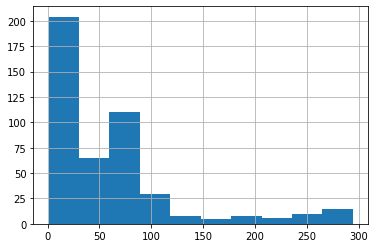

In [ ]:
submission["leaf_weight"].hist()